In [ ]:
from google.colab import files

uploaded = files.upload()

Saving insurance_part_data.csv to insurance_part_data.csv


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
insurance_df = pd.read_csv("insurance_part_data.csv")
insurance_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[3000 rows x 10 columns]

In [ ]:
# Retrieving info of the columns of insurance_df

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [ ]:
# Check for any missing values in insurance_df

insurance_df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [ ]:
# Check for presence of duplicate rows in insurance_df

insurance_df[insurance_df.duplicated()]

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
63     30         C2B       Airlines     Yes       15.0  Online        27   
329    36         EPX  Travel Agency      No        0.0  Online         5   
407    36         EPX  Travel Agency      No        0.0  Online        11   
411    35         EPX  Travel Agency      No        0.0  Online         2   
422    36         EPX  Travel Agency      No        0.0  Online         5   
...   ...         ...            ...     ...        ...     ...       ...   
2940   36         EPX  Travel Agency      No        0.0  Online         8   
2947   36         EPX  Travel Agency      No        0.0  Online        10   
2952   36         EPX  Travel Agency      No        0.0  Online         2   
2962   36         EPX  Travel Agency      No        0.0  Online         4   
2984   36         EPX  Travel Agency      No        0.0  Online         1   

      Sales       Product Name Destination  
63     60.0        Bronze Plan        ASIA  
329    20.0    Customised Plan        ASIA  
407    19.0  Cancellation Plan        ASIA  
411    20.0    Customised Plan        ASIA  
422    20.0    Customised Plan        ASIA  
...     ...                ...         ...  
2940   10.0  Cancellation Plan        ASIA  
2947   28.0    Customised Plan        ASIA  
2952   10.0  Cancellation Plan        ASIA  
2962   20.0    Customised Plan        ASIA  
2984   20.0    Customised Plan        ASIA  

[139 rows x 10 columns]

In [ ]:
# Drop duplicate rows

insurance_df.drop_duplicates(inplace = True)

In [ ]:
insurance_df[insurance_df['Duration'] <= 0]

Age Agency_Code      Type Claimed  Commision Channel  Duration   Sales  \
1508   25         JZI  Airlines      No       6.30  Online        -1   18.00   
1746   48         C2B  Airlines      No       0.14  Online         0    0.51   
2628   37         C2B  Airlines      No      49.60  Online         0  124.00   

         Product Name Destination  
1508      Bronze Plan        ASIA  
1746  Customised Plan        ASIA  
2628      Bronze Plan        ASIA

In [ ]:
insurance_df = insurance_df[insurance_df['Duration'] > 0]
insurance_df

Age Agency_Code           Type Claimed  Commision Channel  Duration  \
0      48         C2B       Airlines      No       0.70  Online         7   
1      36         EPX  Travel Agency      No       0.00  Online        34   
2      39         CWT  Travel Agency      No       5.94  Online         3   
3      36         EPX  Travel Agency      No       0.00  Online         4   
4      33         JZI       Airlines      No       6.30  Online        53   
...   ...         ...            ...     ...        ...     ...       ...   
2995   28         CWT  Travel Agency     Yes     166.53  Online       364   
2996   35         C2B       Airlines      No      13.50  Online         5   
2997   36         EPX  Travel Agency      No       0.00  Online        54   
2998   34         C2B       Airlines     Yes       7.64  Online        39   
2999   47         JZI       Airlines      No      11.55  Online        15   

       Sales       Product Name Destination  
0       2.51    Customised Plan        ASIA  
1      20.00    Customised Plan        ASIA  
2       9.90    Customised Plan    Americas  
3      26.00  Cancellation Plan        ASIA  
4      18.00        Bronze Plan        ASIA  
...      ...                ...         ...  
2995  256.20          Gold Plan    Americas  
2996   54.00          Gold Plan        ASIA  
2997   28.00    Customised Plan        ASIA  
2998   30.55        Bronze Plan        ASIA  
2999   33.00        Bronze Plan        ASIA  

[2858 rows x 10 columns]

In [ ]:
print(f"Claimed status of insurance_df: \n{insurance_df['Claimed'].value_counts()}\n")
print(f"Claimed status of insurance_df: \n{insurance_df['Claimed'].value_counts(normalize = True)}\n")

Claimed status of insurance_df: 
Claimed
No     1944
Yes     914
Name: count, dtype: int64

Claimed status of insurance_df: 
Claimed
No     0.680196
Yes    0.319804
Name: proportion, dtype: float64



Text(0.5, 1.0, 'Claimed status in insurance_df')

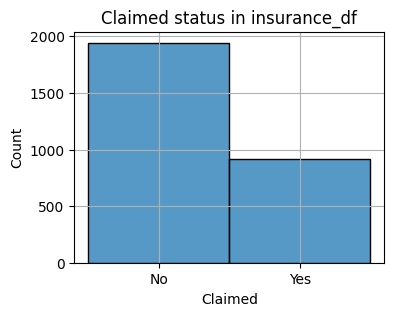

In [ ]:
plt.figure(figsize = (4, 3))
sns.histplot(x = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Claimed status in insurance_df")

* The dataset reveals a notable class imbalance in insurance claims, with 68% of instances (1944 out of 2858) classified as "No" (not claimed) and 32% (914 instances) as "Yes" (claimed).

In [ ]:
print(f"Number of unique age in insurance_df: {insurance_df['Age'].nunique()}\n")
print(f"Unique age in insurance_df: {insurance_df['Age'].unique()}\n")
print(f"Count of each age in insurance_df:{insurance_df['Age'].value_counts()}\n")

Number of unique age in insurance_df: 70

Unique age in insurance_df: [48 36 39 33 45 61 37 43 52 31 23 29 28 27 44 46 25 60 30 40 32 26 38 42
 51 24 59 41 56 35 58 73 47 50 22 20 53 68 34 79 19 21 66 69 57 63 54 64
 71 49 62 84 17 55 76 72 65 67 75 70 18 77 14 81 74  8 16 83 15 11]

Count of each age in insurance_df:Age
36    880
31    124
48    106
30     91
35     91
     ... 
14      1
8       1
83      1
15      1
11      1
Name: count, Length: 70, dtype: int64



Text(0.5, 1.0, 'Histplot for the age of insured in insurance_df')

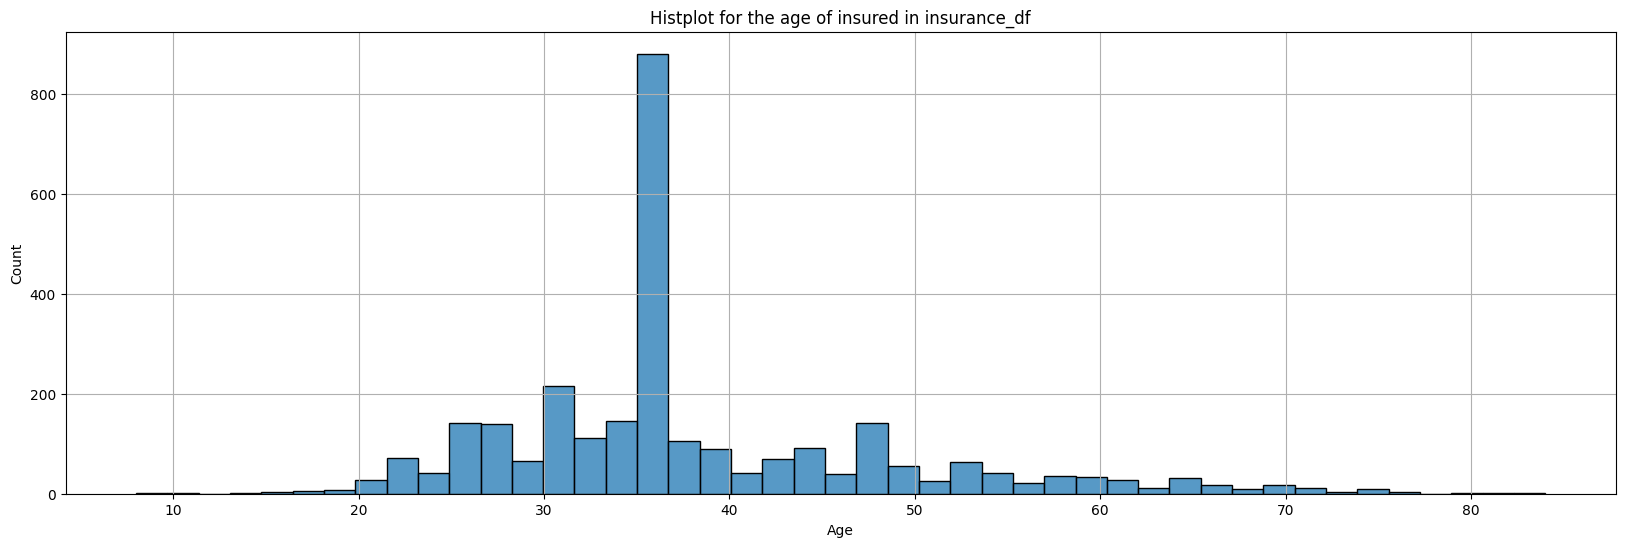

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(x = 'Age', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot for the age of insured in insurance_df")

* The age of insured individuals spans a wide range (from 8 to 84 years), with a significant concentration around age 36 (880 instances).
This suggests a specific demographic dominates the customer base, which may influence claim patterns.

Text(0.5, 1.0, 'Histplot for the age of insured in insurance_df')

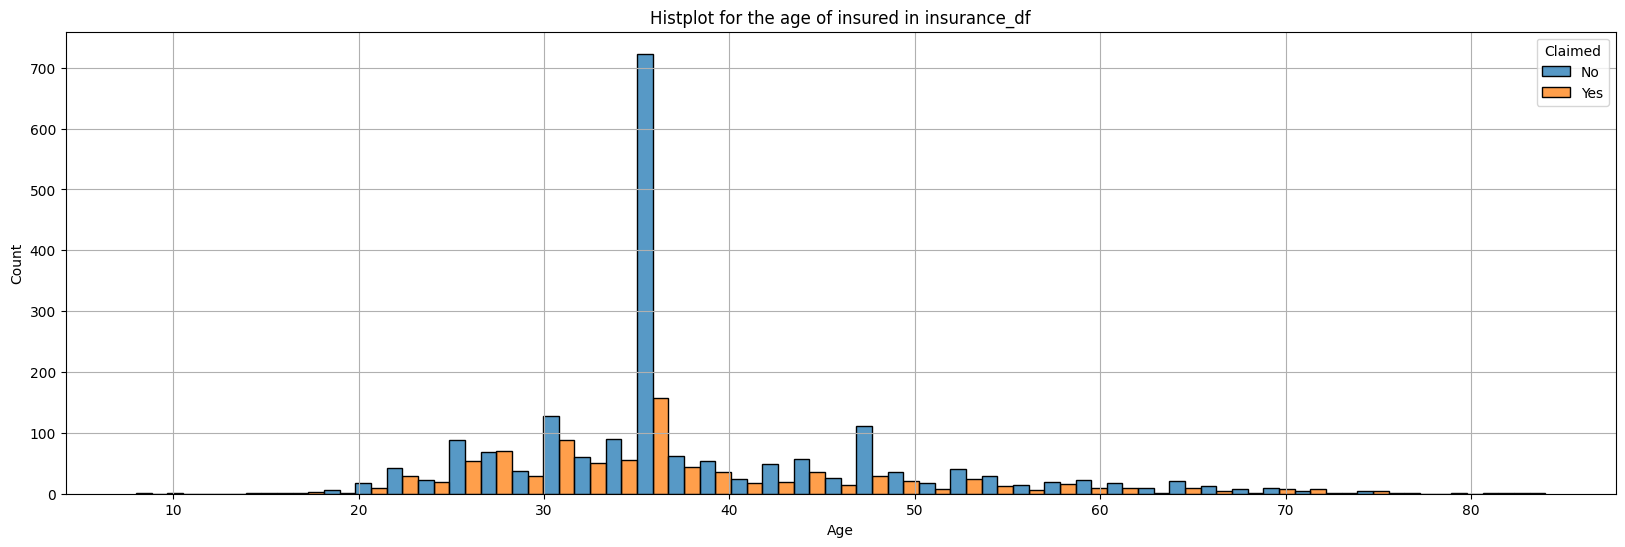

In [ ]:
plt.figure(figsize=(20, 6))
sns.histplot(x = 'Age', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.grid(visible = True)
plt.title("Histplot for the age of insured in insurance_df")


Text(0.5, 1.0, 'Scatterplot illustrating the distribution of the age of insured in insurance_df along with its claimed status')

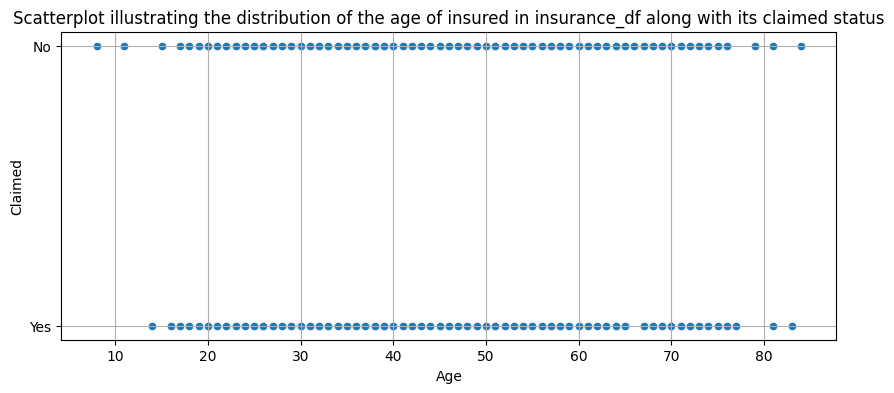

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x = 'Age', y = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Scatterplot illustrating the distribution of the age of insured in insurance_df along with its claimed status")

* Histograms and scatterplots reveal that claim likelihood does not strongly correlate with age alone, though certain age groups (e.g., around 36) show higher claim frequencies due to their larger representation in the dataset.

In [ ]:
print(f"Distribution of commission in terms of count in insurance_df:{insurance_df['Commision'].value_counts()}\n")

Distribution of commission in terms of count in insurance_df:Commision
0.00     1239
23.76      61
63.21      59
54.00      59
17.82      57
         ... 
23.00       1
13.49       1
30.45       1
17.39       1
13.50       1
Name: count, Length: 323, dtype: int64



Text(0.5, 1.0, 'Histplot illustrating the distribution the commission received for tour insurance in insurance_df')

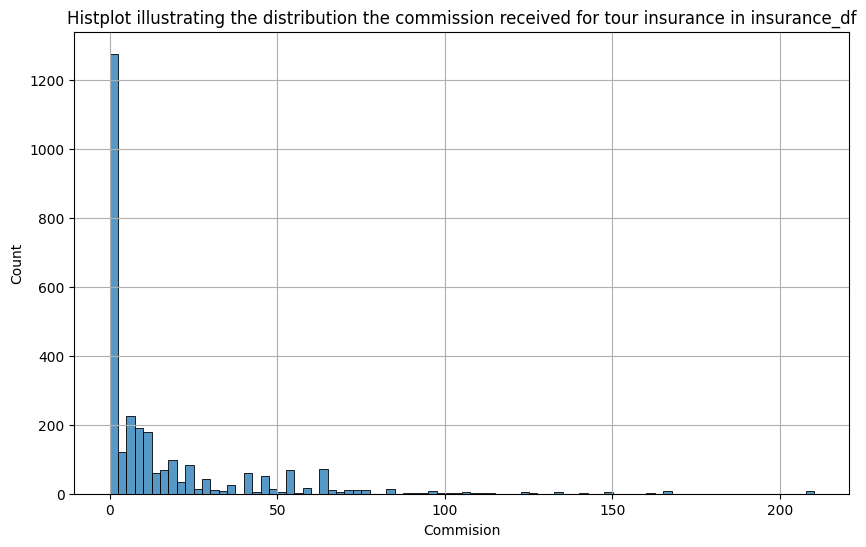

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x = 'Commision', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot illustrating the distribution the commission received for tour insurance in insurance_df")

* Commission values show a high frequency of zero (1239 instances), indicating many policies may be sold without commission.

Text(0.5, 1.0, 'Scatterplot illustrating the distribution of commission received for tour insurance along with its claimed status')

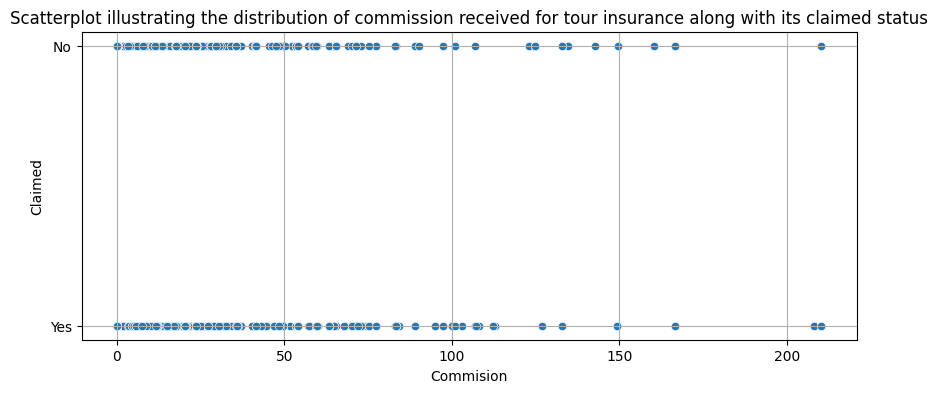

In [ ]:
plt.figure(figsize=(10, 4))
sns.scatterplot(x = 'Commision', y = 'Claimed', data = insurance_df)
plt.grid(visible = True)
plt.title("Scatterplot illustrating the distribution of commission received for tour insurance along with its claimed status")

Text(0.5, 1.0, 'Displot illustrating the distribution of commission received for tour insurance along with its claimed status')

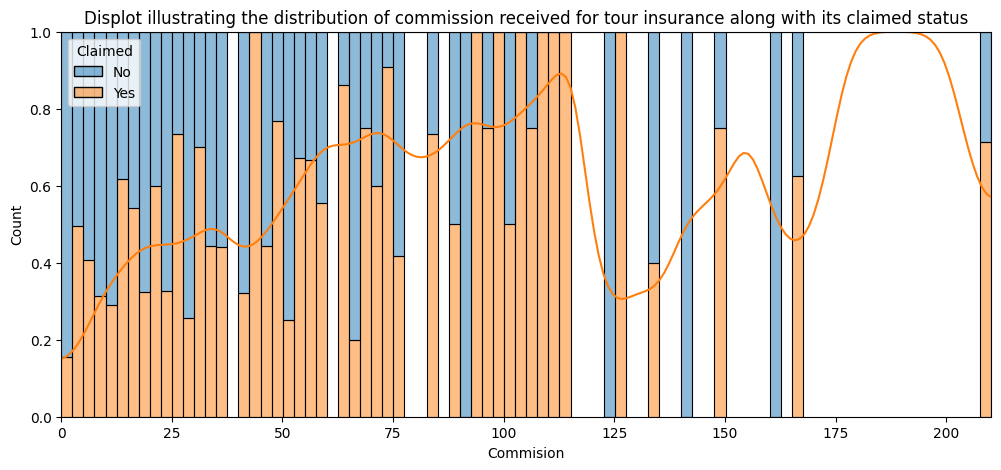

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(x = 'Commision', data = insurance_df, hue = 'Claimed', kde = True, multiple = 'fill')
plt.title("Displot illustrating the distribution of commission received for tour insurance along with its claimed status")

* Scatterplots and distribution plots suggest no clear linear relationship between commission amounts and claim status, though lower commission policies often align with non-claimed instances.

In [ ]:
# Sales by agency

total_sales_by_agency = insurance_df.groupby('Agency_Code')['Sales'].sum()
total_sales_by_agency = total_sales_by_agency.reset_index()
total_sales_by_agency

Agency_Code     Sales
0         C2B  86067.34
1         CWT  31496.55
2         EPX  50350.02
3         JZI   8632.87

* Four agencies dominate total sales, with C2B (86067) leading followed by EPX (50350.02), CWT (31496.55 )& JZI (8632.87).

Text(0.5, 1.0, 'Histplot illustrating the distribution of sales in insurance_df')

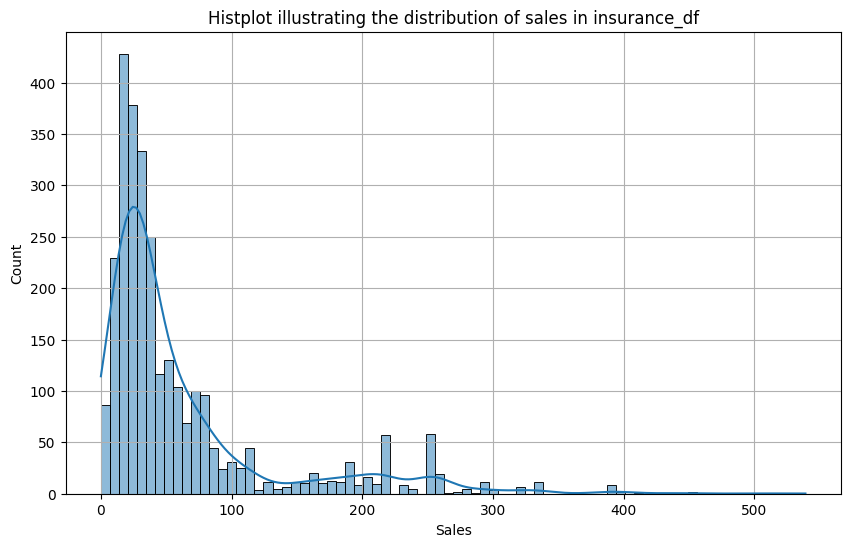

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(x = 'Sales', data = insurance_df, kde = True)
plt.grid(visible = True)
plt.title('Histplot illustrating the distribution of sales in insurance_df')

* Sales distribution highlights varied policy values with potential outliers

Text(0.5, 1.0, 'Histplot illustrating the distribution of sales for both claimed and unclaimed in insurance_df')

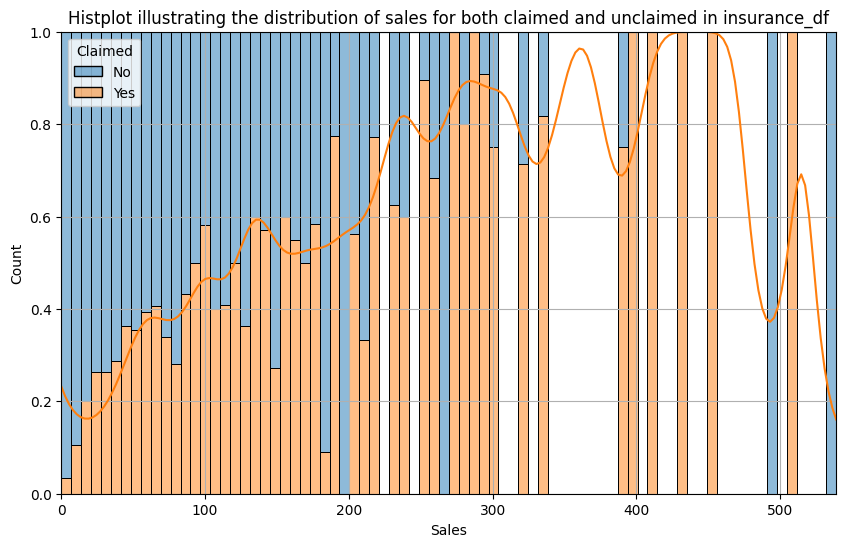

In [ ]:
plt.figure(figsize = (10, 6))
sns.histplot(x = 'Sales', data = insurance_df, hue = 'Claimed', kde = True, multiple = 'fill')
plt.grid(visible = True)
plt.title('Histplot illustrating the distribution of sales for both claimed and unclaimed in insurance_df')

* Higher sales values appear to have a slight association with claimed status in histograms with KDE overlays, hinting that more expensive policies might be more likely to result in claims.

In [ ]:
print(f"Number of tour durations in insurance_df: {insurance_df['Duration'].nunique()}\n")
print(f"Duration and number of tours for the said duration in insurance_df:{insurance_df['Duration'].value_counts()}\n")

Number of tour durations in insurance_df: 255

Duration and number of tours for the said duration in insurance_df:Duration
10      78
6       77
11      77
9       75
8       71
        ..
4580     1
184      1
223      1
466      1
416      1
Name: count, Length: 255, dtype: int64



Text(0.5, 1.0, 'Histplot for the no of tours for each duration type in insurance_df')

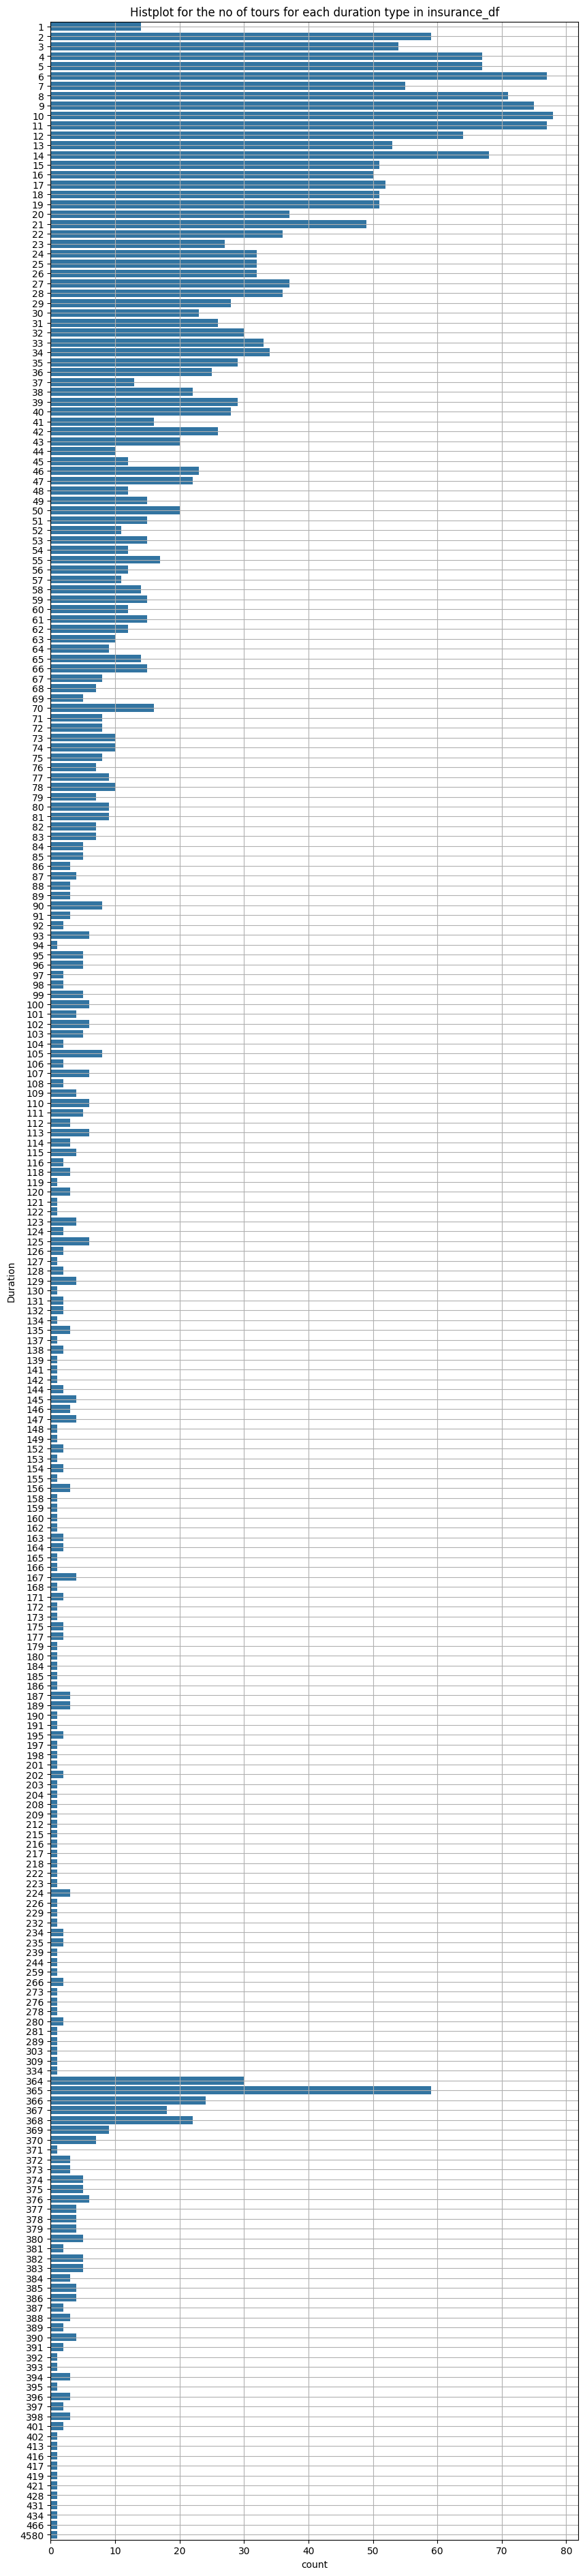

In [ ]:
plt.figure(figsize=(10, 48))
sns.countplot(y = 'Duration', data = insurance_df)
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each duration type in insurance_df")

* Tour durations vary widely (255 unique values), with shorter durations like 10 days (78 instances) being more common.
This variability suggests diverse travel plans among customers.

Text(0.5, 1.0, 'Histplot for the no of tours for each duration type along with insurance claimed status in insurance_df')

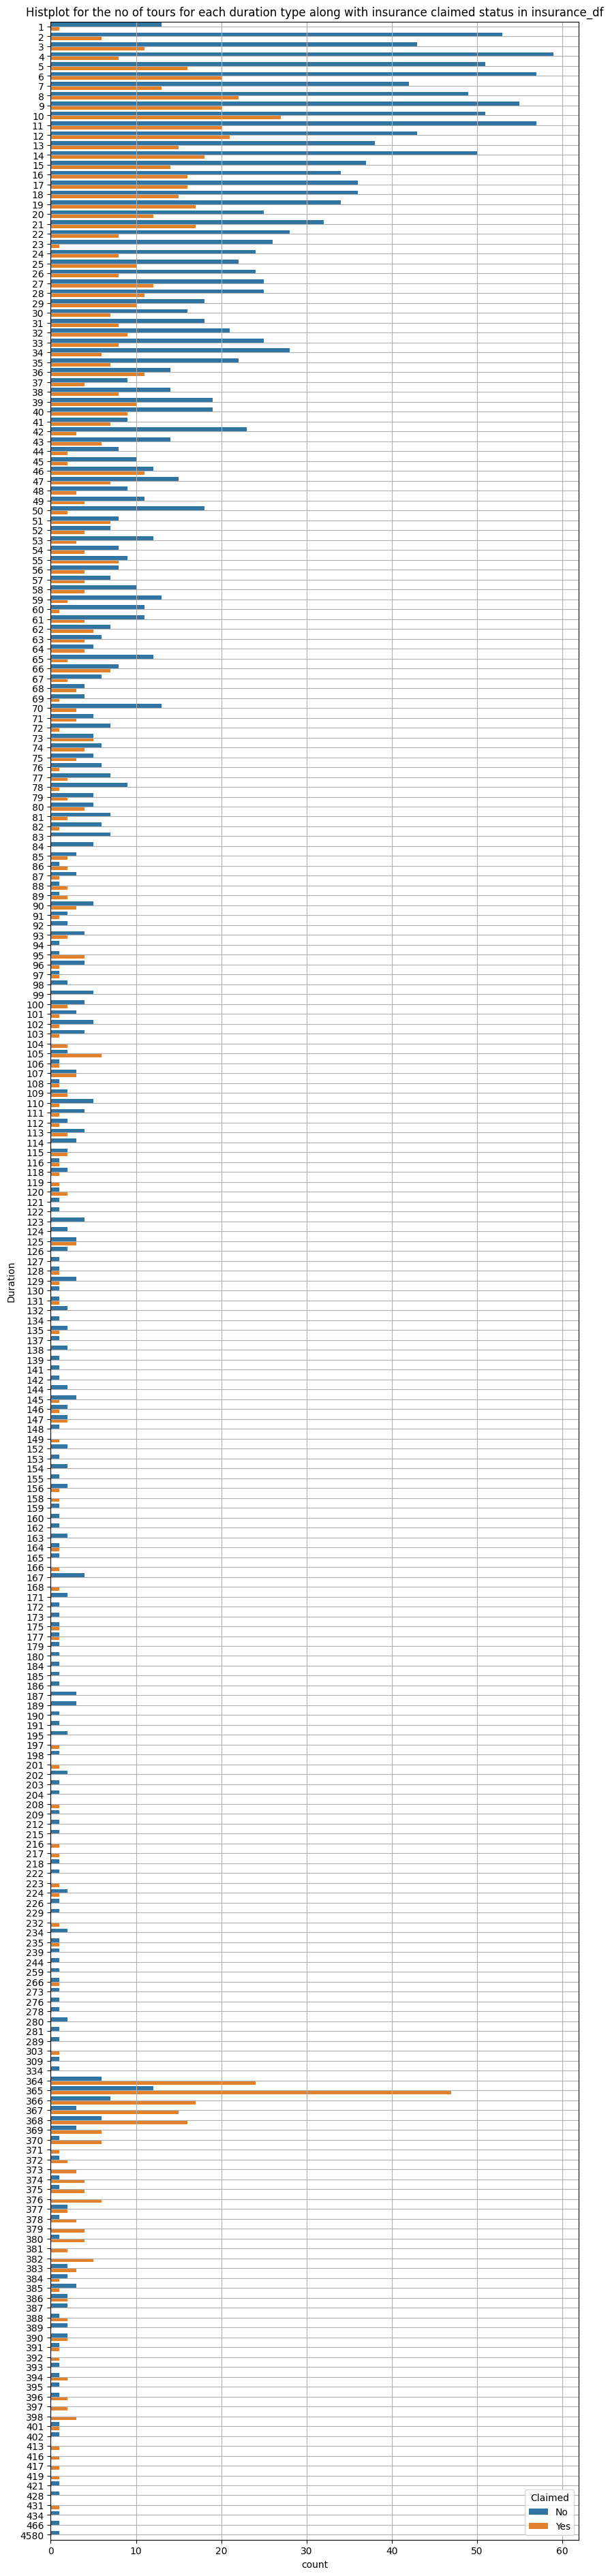

In [ ]:
plt.figure(figsize=(10, 48))
sns.countplot(y = 'Duration', data = insurance_df, hue = 'Claimed')
plt.ylabel('Duration')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each duration type along with insurance claimed status in insurance_df")

In [ ]:
print(f"Number of tour firm selling tour insurance in insurance_df: {insurance_df['Agency_Code'].nunique()}\n")
print(f"Number of insurance sold by each tour firm in insurance_df:{insurance_df['Agency_Code'].value_counts()}\n")

Number of tour firm selling tour insurance in insurance_df: 4

Number of insurance sold by each tour firm in insurance_df:Agency_Code
EPX    1238
C2B     911
CWT     471
JZI     238
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of insurance sold by each tour firm in insurance_df')

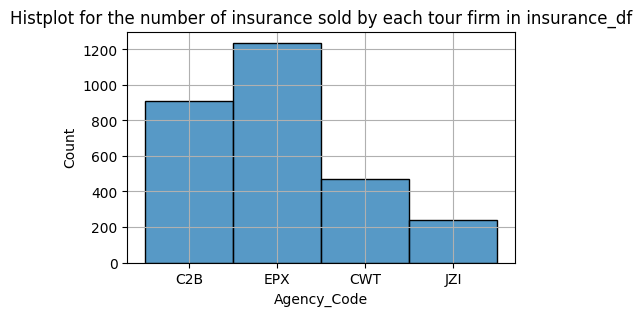

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Agency_Code', data = insurance_df)
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot for the number of insurance sold by each tour firm in insurance_df")

* Four agencies dominate sales, with EPX selling the most (1238 policies), and five product types exist, with the Customized Plan leading (1070 instances) indicating a preference for certain agencies and products.

Text(0.5, 1.0, 'Histplot for the number of insurance sold by each tour firms along with the number of insurance claimed in insurance_df')

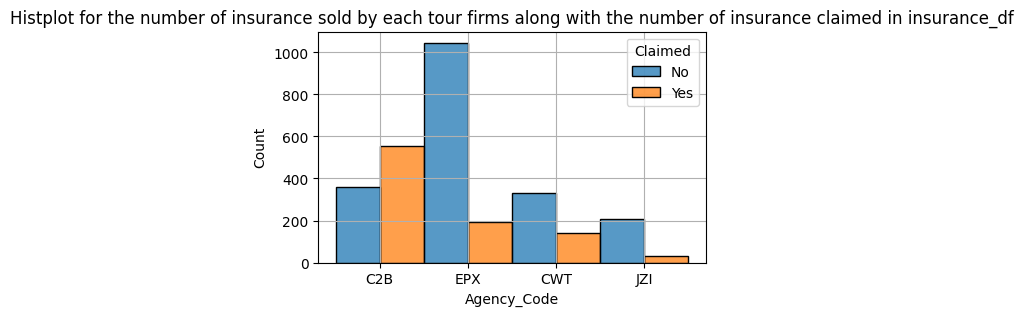

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot for the number of insurance sold by each tour firms along with the number of insurance claimed in insurance_df")

* Agency C2B show higher claims, but the proportion of claims varies across agencies, indicating agency-specific risk profiles or customer behaviors.

Text(0.5, 1.0, 'Histplot illustrating the type of tour insurance being sold by each tour firm in insurance_df')

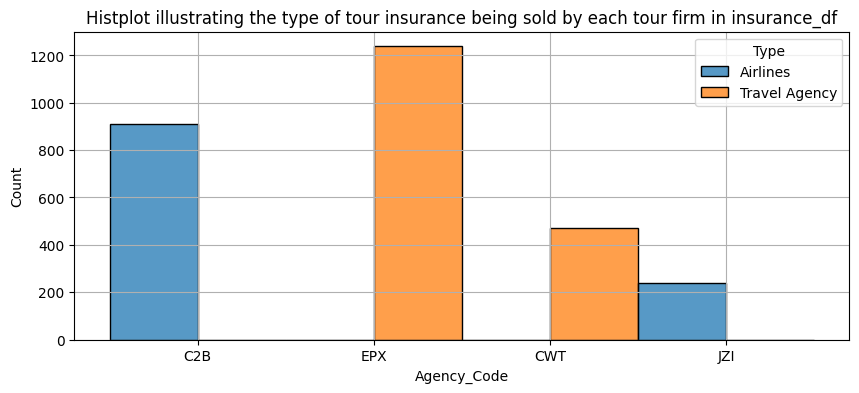

In [ ]:
plt.figure(figsize=(10, 4))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot illustrating the type of tour insurance being sold by each tour firm in insurance_df")

* Agencies like C2B & JZI are Airlines whereas agencies like EPX & CWT are Travel Agency.

Text(0.5, 1.0, 'Histplot illustrating the number of tour insurance sold by each agency through different channels in insurance_df')

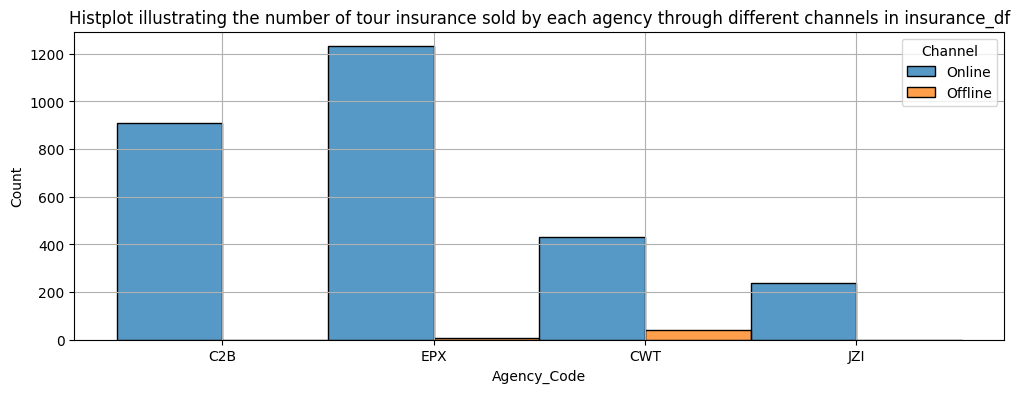

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Agency_Code', data = insurance_df, hue = 'Channel', multiple = 'dodge')
plt.xlabel('Agency_Code')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of tour insurance sold by each agency through different channels in insurance_df")

* C2B & JZI sold insurance online.
* EPX & CWT sold the vast majority of insurance is sold online followed by offline.

In [ ]:
print(f"Type of tour insurance firms in insurance_df: {insurance_df['Type'].nunique()}\n")
print(f"Number of tours conducted by each type of tour insurance firm in insurance_df:{insurance_df['Type'].value_counts()}\n")

Type of tour insurance firms in insurance_df: 2

Number of tours conducted by each type of tour insurance firm in insurance_df:Type
Travel Agency    1709
Airlines         1149
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the no of tours for each type of tour insurance firms in insurance_df')

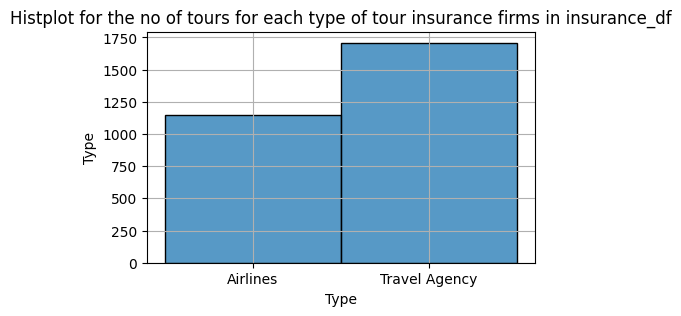

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Type', data = insurance_df, )
plt.ylabel('Type')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each type of tour insurance firms in insurance_df")

* Travel Agencies (1709 instances) sell more through online channels compared to Airlines (1149 instances), with specific agencies like EPX heavily favoring online sales. This interaction highlights channel preferences based on agency type.

Text(0.5, 1.0, 'Histplot for the no of tours for each type of tour insurance firms along with insurance claimed status in insurance_df')

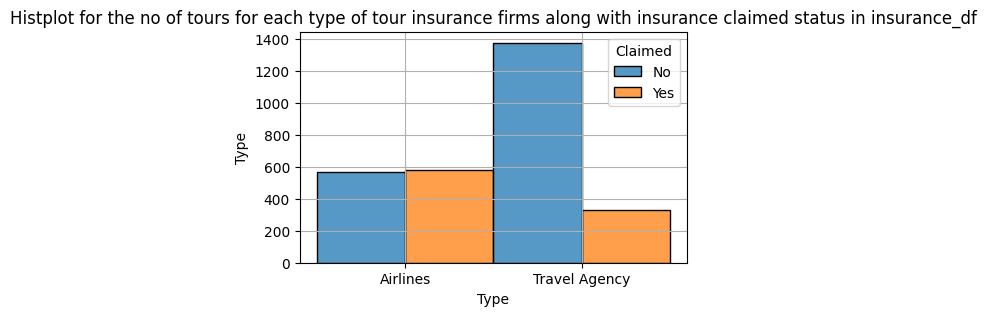

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Type', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.ylabel('Type')
plt.grid(visible = True)
plt.title("Histplot for the no of tours for each type of tour insurance firms along with insurance claimed status in insurance_df")

In [ ]:
# Distribution channel of tour insurance agencies (Channel) Distibution channel

print(f"Number of channels through which the insurance firm is providing tour insurance: {insurance_df['Channel'].nunique()}\n")
print(f"Number of insurance bought through each channel: \n{insurance_df['Channel'].value_counts()}\n")

Number of channels through which the insurance firm is providing tour insurance: 2

Number of insurance bought through each channel: 
Channel
Online     2812
Offline      46
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot illustrating the number of insurance bought through each channel in insurance_df')

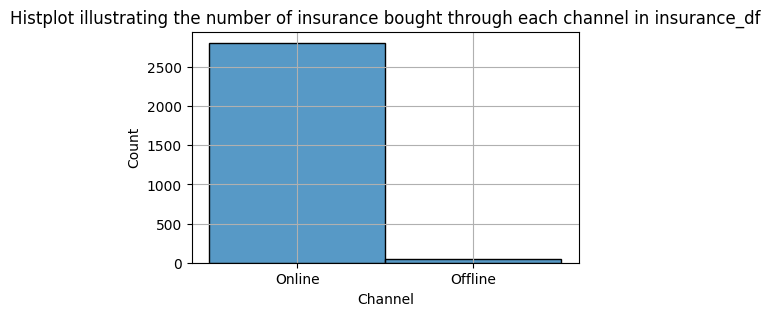

In [ ]:
plt.figure(figsize=(5, 3))
sns.histplot(x = 'Channel', data = insurance_df)
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of insurance bought through each channel in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating number of insurance sold by each tour firm through different channels in insurance_df')

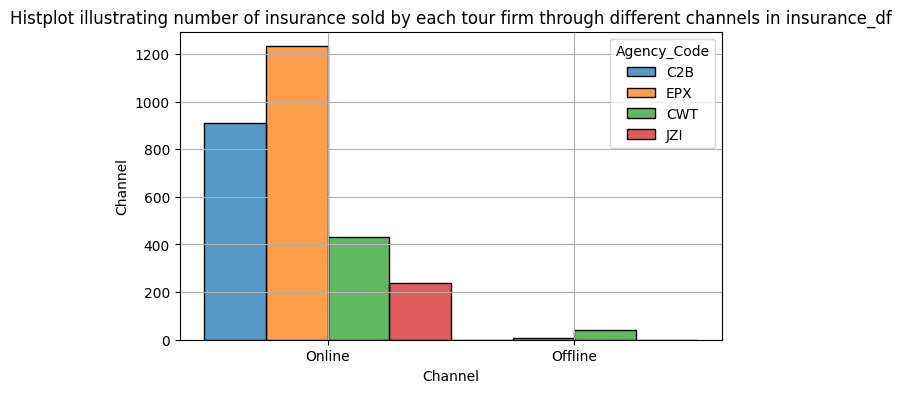

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.ylabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating number of insurance sold by each tour firm through different channels in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the type of tour insurance firm and number of insurance sold by them through different channels in insurance_df')

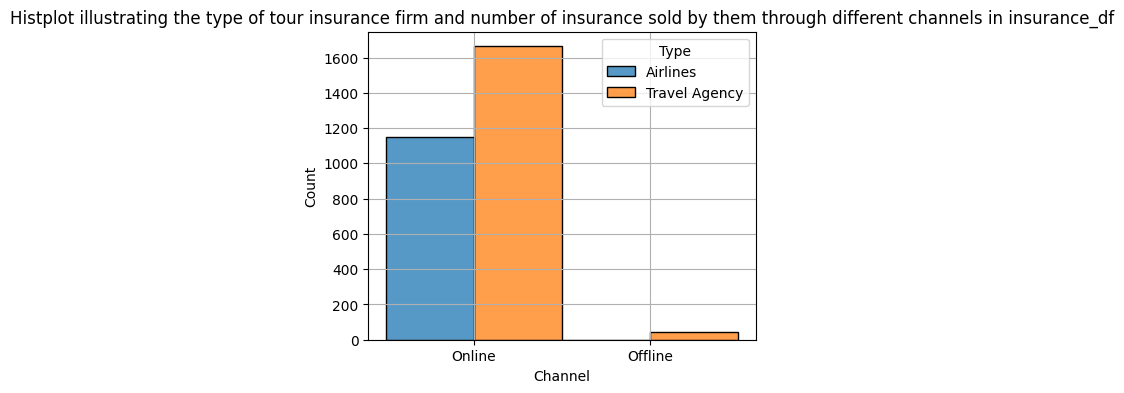

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the type of tour insurance firm and number of insurance sold by them through different channels in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the number of insurance bought through each channel with claimed status in insurance_df')

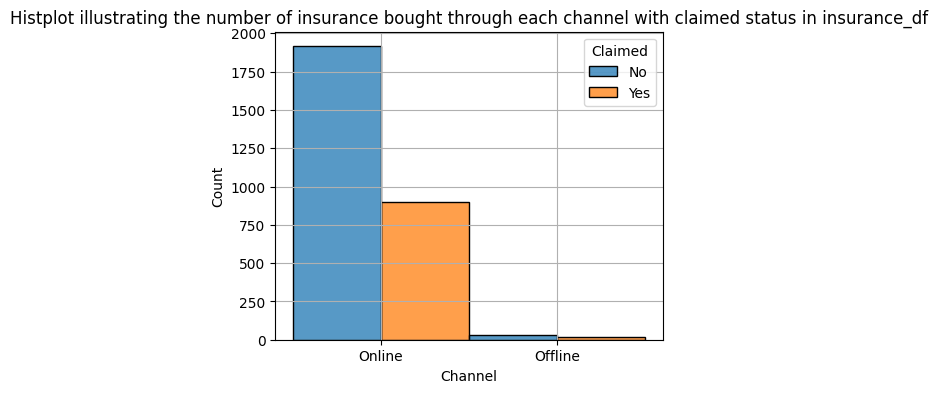

In [ ]:
plt.figure(figsize=(5, 4))
sns.histplot(x = 'Channel', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Channel')
plt.grid(visible = True)
plt.title("Histplot illustrating the number of insurance bought through each channel with claimed status in insurance_df")

* The vast majority of insurance is sold online (2812 instances) compared to offline (46 instances), with online channels showing a slightly higher proportion of claims, possibly due to volume.

In [ ]:
# Name of the tour insurance products (Product)

print(f"Number of products sold by tour insurance firms: {insurance_df['Product Name'].nunique()}\n")
print(f"Sales of each product:\n{insurance_df['Product Name'].value_counts()}\n")

Number of products sold by tour insurance firms: 5

Sales of each product:
Product Name
Customised Plan      1070
Bronze Plan           643
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products in insurance_df')

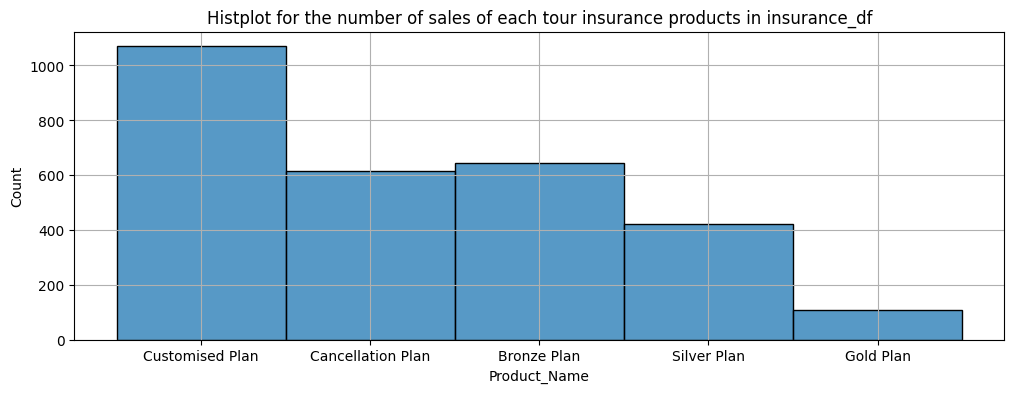

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Product Name', data = insurance_df)
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products in insurance_df")

* Among the various products, Customised Plan were most sold followed by Bronze Plan, Cancellation Plan, Silver Plan & Gold Plan



Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products by each tour agency in insurance_df')

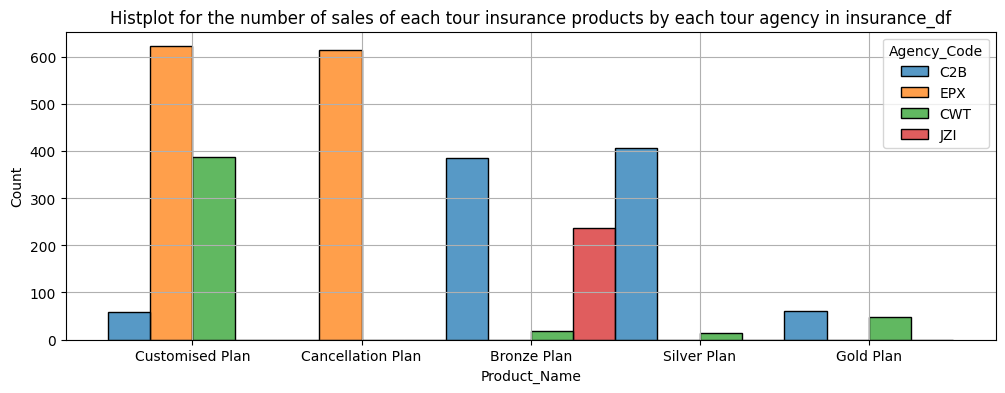

In [ ]:
plt.figure(figsize=(12, 4))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products by each tour agency in insurance_df")

* Four agencies dominate sales, with EPX selling the most (1238 policies), and five product types exist, with the Customized Plan leading (1070 instances).

* Sales of Customized Plan is dominated by C2B, EPX & CWT.  

* Sales of Cancellation Plan is dominated by EPX.

* Sales of Bronze Plan is dominated by C2B, CWT & JZI.

* Sales of Silver Plan is dominated by C2B & CWT.

* Sales of Gold Plan is dominated by C2B & CWT.

Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products through each distribution channel in insurance_df')

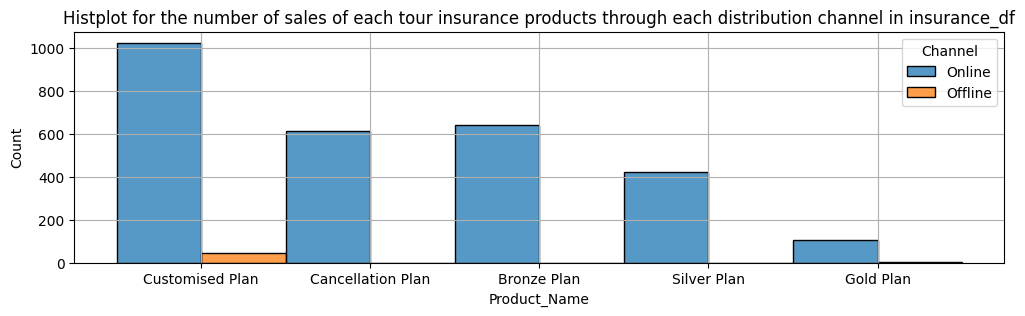

In [ ]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Channel', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products through each distribution channel in insurance_df")

* The vast majority of insurance is sold online (2812 instances) compared to offline (46 instances).

Text(0.5, 1.0, 'Histplot for the number of sales of each tour insurance products by each insurance firm in insurance_df')

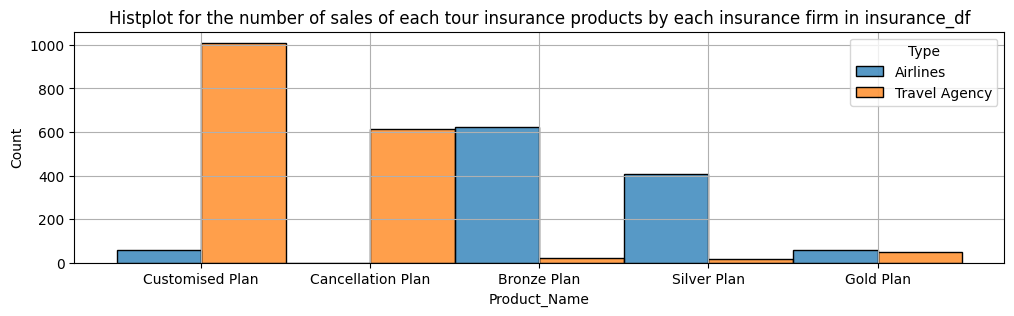

In [ ]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot for the number of sales of each tour insurance products by each insurance firm in insurance_df")

Text(0.5, 1.0, 'Histplot illustrating the claimed status for the each tour insurance products sold in insurance_df')

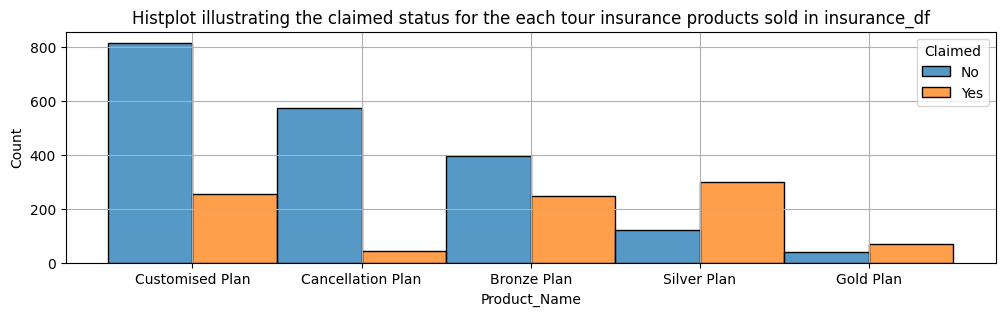

In [ ]:
plt.figure(figsize=(12, 3))
sns.histplot(x = 'Product Name', data = insurance_df, hue = 'Claimed', multiple = 'dodge')
plt.xlabel('Product_Name')
plt.grid(visible = True)
plt.title("Histplot illustrating the claimed status for the each tour insurance products sold in insurance_df")

* Most of the claims came from the Silver Plan followed by Bronze Plan, Customized Plan Gold Plan & Cancellation Plan.

In [ ]:
# Destination of the tour (Destination)

print(f"Number of destinations in insurance firms: {insurance_df['Destination'].nunique()}\n")
print(f"Number of tours to each dstinations: \n{insurance_df['Destination'].value_counts()}\n")

Number of destinations in insurance firms: 3

Number of tours to each dstinations: 
Destination
ASIA        2324
Americas     319
EUROPE       215
Name: count, dtype: int64



Text(0.5, 1.0, 'Histplot for the number of tours to each destination in insurance_df')

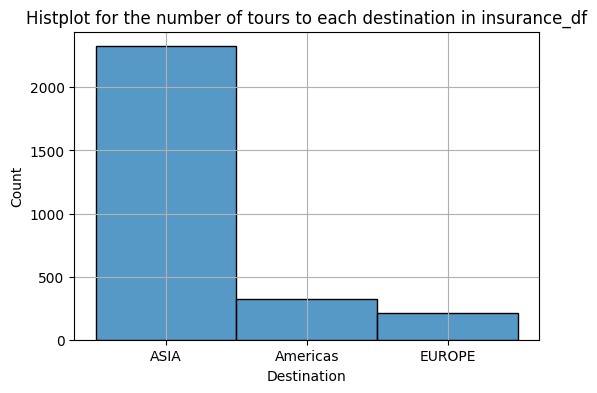

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df)
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination in insurance_df")

* Most of the tour insurance buyers are headed to Asia followed by Americas & Europe

Text(0.5, 1.0, 'Histplot for the number of tours to each destination by each agency in insurance_df')

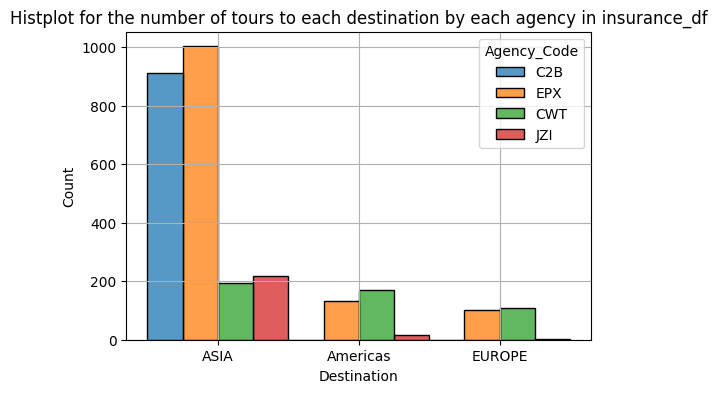

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df, hue = 'Agency_Code', multiple = 'dodge')
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination by each agency in insurance_df")

* People travelling to Asia bought their insurance from C2B, EPX, CWT & JZI.
* People travelling to Americas bought their insurance from EPX, CWT & JZI.
* People travelling to Eorope bought their insurance from EPX, CWT & JZI.

Text(0.5, 1.0, 'Histplot for the number of tours to each destination by each agency in insurance_df')

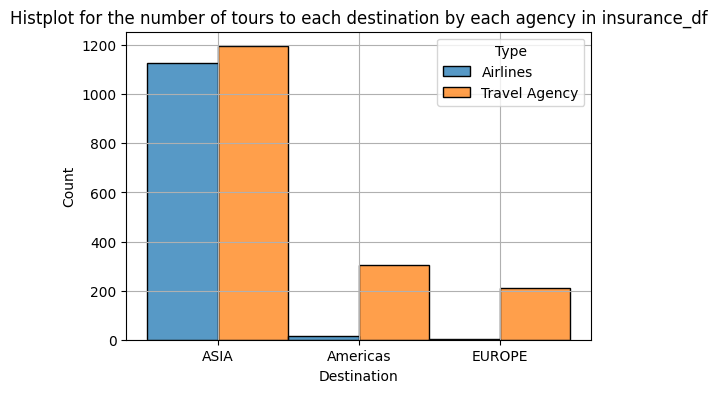

In [ ]:
plt.figure(figsize=(6, 4))
sns.histplot(x = 'Destination', data = insurance_df, hue = 'Type', multiple = 'dodge')
plt.xlabel('Destination')
plt.grid(visible = True)
plt.title("Histplot for the number of tours to each destination by each agency in insurance_df")

* Most people travelling to Asia, Americas & Europe bought their insurance through Travel Agency followed by Airlines

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2858 non-null   int64  
 1   Agency_Code   2858 non-null   object 
 2   Type          2858 non-null   object 
 3   Claimed       2858 non-null   object 
 4   Commision     2858 non-null   float64
 5   Channel       2858 non-null   object 
 6   Duration      2858 non-null   int64  
 7   Sales         2858 non-null   float64
 8   Product Name  2858 non-null   object 
 9   Destination   2858 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 245.6+ KB


In [ ]:
insurance_df.describe()

Age    Commision     Duration        Sales
count  2858.000000  2858.000000  2858.000000  2858.000000
mean     38.205738    15.077218    72.196291    61.772841
std      10.679258    25.830284   136.028290    71.413840
min       8.000000     0.000000     1.000000     0.000000
25%      31.000000     0.000000    12.000000    20.000000
50%      36.000000     5.630000    28.000000    33.500000
75%      43.000000    17.820000    66.000000    69.300000
max      84.000000   210.210000  4580.000000   539.000000

Text(0.5, 1.0, 'box plot for continuous variables')

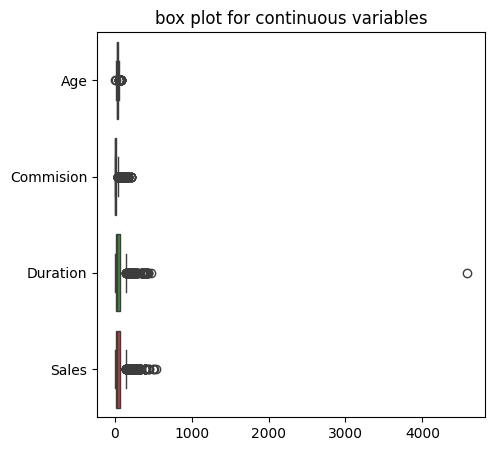

In [ ]:
plt.figure(figsize=(5, 5))
sns.boxplot(insurance_df[['Age', 'Commision', 'Duration', 'Sales']], orient = 'h')
plt.title("box plot for continuous variables")

* Age, Commision, Duration & Sales contains outliers

Text(0.5, 1.0, 'Pairplot with all continuous features in insurance_df')

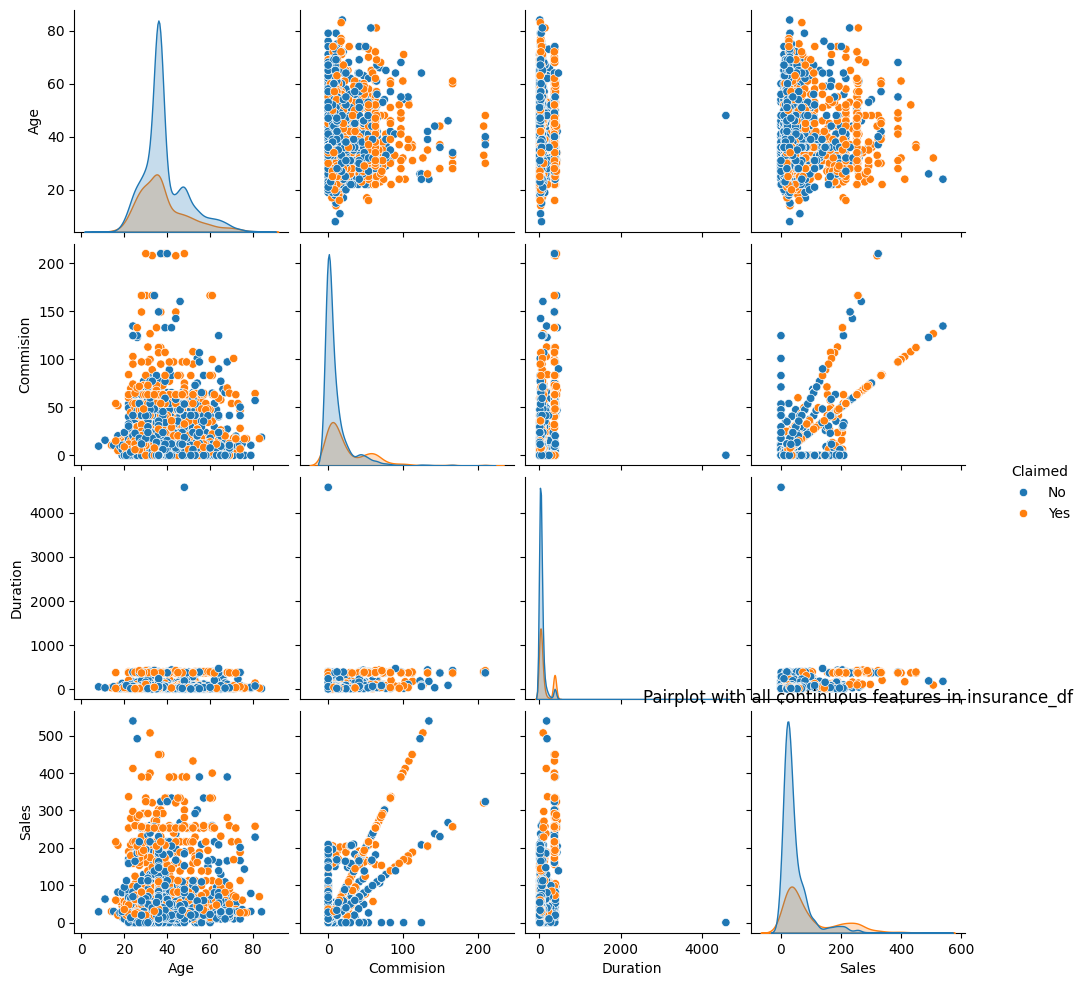

In [ ]:
sns.pairplot(insurance_df, hue = 'Claimed')
plt.title("Pairplot with all continuous features in insurance_df")

Text(0.5, 1.0, 'Heatmap illustrating the correlation among the continuous features in insurance_df')

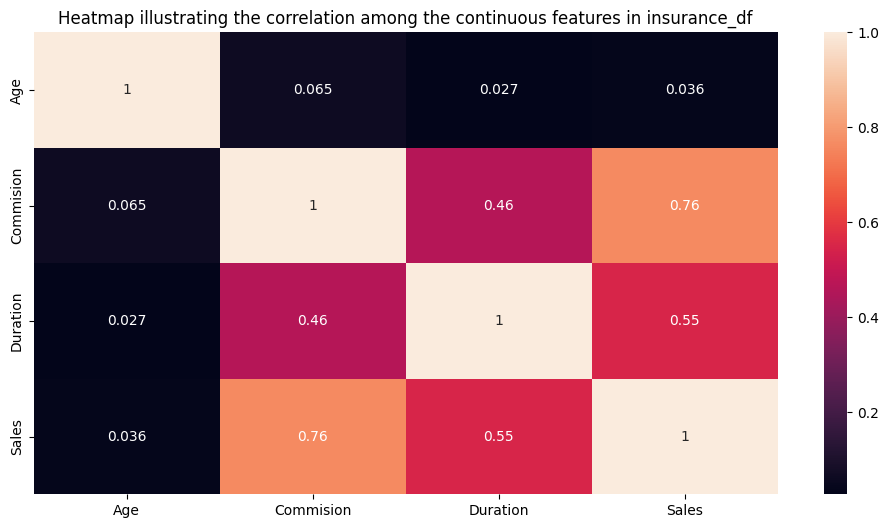

In [ ]:
plt.figure(figsize =(12, 6))
sns.heatmap(insurance_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot = True)
plt.title("Heatmap illustrating the correlation among the continuous features in insurance_df")

* A heatmap of continuous variables (Age, Commission, Duration, Sales) shows a moderate positive correlation between Sales and Commission, suggesting that higher policy sales often yield higher commissions.
* Correlations with Age and Duration are weak, indicating limited linear relationships among these variables.


In [ ]:
# Converting the object types to categorical types

for feature in insurance_df.columns:
  if insurance_df[feature].dtype == 'object':
    print('feature: ', feature)
    print(pd.Categorical(insurance_df[feature].unique()))
    print(pd.Categorical(insurance_df[feature].unique()).codes)
    insurance_df.loc[:, feature] = pd.Categorical(insurance_df[feature]).codes
    print('\n\n')

insurance_df


feature:  Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]



feature:  Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]



feature:  Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]



feature:  Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]



feature:  Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan',
                         'Silver Plan']
[2 1 0 4 3]



feature:  Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]





Age Agency_Code Type Claimed  Commision Channel  Duration   Sales  \
0      48           0    0       0       0.70       1         7    2.51   
1      36           2    1       0       0.00       1        34   20.00   
2      39           1    1       0       5.94       1         3    9.90   
3      36           2    1       0       0.00       1         4   26.00   
4      33           3    0       0       6.30       1        53   18.00   
...   ...         ...  ...     ...        ...     ...       ...     ...   
2995   28           1    1       1     166.53       1       364  256.20   
2996   35           0    0       0      13.50       1         5   54.00   
2997   36           2    1       0       0.00       1        54   28.00   
2998   34           0    0       1       7.64       1        39   30.55   
2999   47           3    0       0      11.55       1        15   33.00   

     Product Name Destination  
0               2           0  
1               2           0  
2               2           1  
3               1           0  
4               0           0  
...           ...         ...  
2995            3           1  
2996            3           0  
2997            2           0  
2998            0           0  
2999            0           0  

[2858 rows x 10 columns]

In [ ]:
# using dictionary to convert specific columns
convert_dict = {'Agency_Code': int,
                'Type': int,
                'Claimed': int,
                'Channel': int,
                'Product Name': int,
                'Destination': int}

insurance_df = insurance_df.astype(convert_dict)
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2858 non-null   int64  
 1   Agency_Code   2858 non-null   int64  
 2   Type          2858 non-null   int64  
 3   Claimed       2858 non-null   int64  
 4   Commision     2858 non-null   float64
 5   Channel       2858 non-null   int64  
 6   Duration      2858 non-null   int64  
 7   Sales         2858 non-null   float64
 8   Product Name  2858 non-null   int64  
 9   Destination   2858 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 310.1 KB


In [ ]:
insurance_df.head(10)

Age  Agency_Code  Type  Claimed  Commision  Channel  Duration  Sales  \
0   48            0     0        0       0.70        1         7   2.51   
1   36            2     1        0       0.00        1        34  20.00   
2   39            1     1        0       5.94        1         3   9.90   
3   36            2     1        0       0.00        1         4  26.00   
4   33            3     0        0       6.30        1        53  18.00   
5   45            3     0        1      15.75        1         8  45.00   
6   61            1     1        0      35.64        1        30  59.40   
7   36            2     1        0       0.00        1        16  80.00   
8   36            2     1        0       0.00        1        19  14.00   
9   36            2     1        0       0.00        1        42  43.00   

   Product Name  Destination  
0             2            0  
1             2            0  
2             2            1  
3             1            0  
4             0            0  
5             0            0  
6             2            1  
7             1            0  
8             1            0  
9             1            0

In [ ]:
# Separating the dependent and independent variables

X = insurance_df.drop('Claimed', axis = 1)
y = insurance_df['Claimed']

In [ ]:
# Dividing the dependent and independent variables into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 121)

In [ ]:
# Decision Tree Classifier

dtcl = DecisionTreeClassifier(random_state = 121)
dtcl.fit(X_train, y_train)

DecisionTreeClassifier(random_state=121)

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
file = open('/content/drive/My Drive/Colab Notebooks/insurance_tree.dot', 'w')
train_char_label = ['1', '0']
dot_data = export_graphviz(dtcl, out_file = file, feature_names = list(X_train), class_names = list(train_char_label))
file.close()

Mounted at /content/drive


In [ ]:
# dtcl prediction on train data

y_train_predict = dtcl.predict(X_train)

In [ ]:
# dtcl performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1359    0
1     9  632

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1359
           1       1.00      0.99      0.99       641

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
y_train_predict_prob = dtcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of dtcl on train data: {}'.format(roc_score))

roc_auc_score of dtcl on train data: 0.9999535080740978


Text(0.5, 1.0, 'ROC curve of dtcl on training data.')

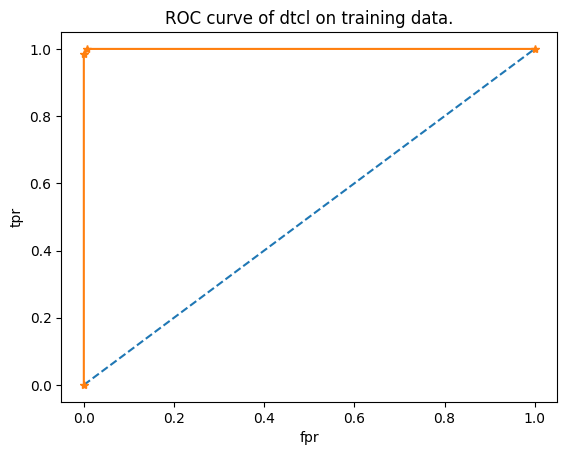

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of dtcl on training data.')

In [ ]:
# dtcl prediction on test data

y_test_predict = dtcl.predict(X_test)

In [ ]:
# dtcl performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  440  145
1  134  139

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       585
           1       0.49      0.51      0.50       273

    accuracy                           0.67       858
   macro avg       0.63      0.63      0.63       858
weighted avg       0.68      0.67      0.68       858



In [ ]:
y_test_predict_prob = dtcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of dtcl on test data: {}'.format(roc_score))

roc_auc_score of dtcl on test data: 0.6293885601577909


Text(0.5, 1.0, 'ROC curve of dtcl on test data.')

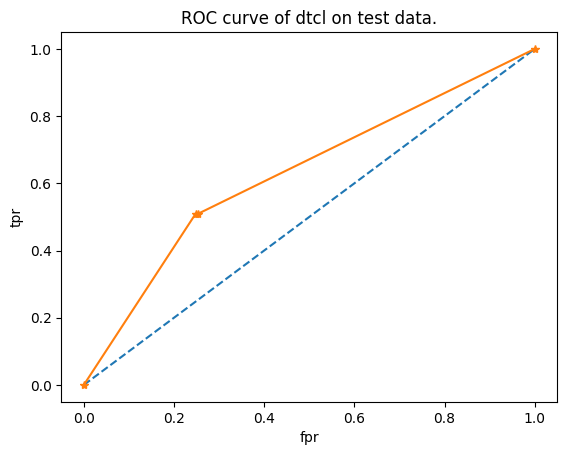

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of dtcl on test data.')

**Training Set Performance:**
The Decision Tree Classifier (dtcl) exhibits exceptional performance on the training data, achieving near-perfect metrics with an accuracy of 1.00, precision, recall, and F1-score close to 1.00 for both classes (0 and 1).
The ROC AUC score is an impressive 0.99995, indicating excellent discrimination capability on the training set.

**Test Set Performance:**
On the test set, the performance drops significantly, with an accuracy of 0.67. Precision, recall, and F1-score for class 0 are around 0.76-0.77, but for class 1, they hover around 0.49-0.51, showing a struggle to predict the minority class effectively.
The ROC AUC score decreases to 0.629, reflecting poorer generalization to unseen data.

**Analysis:** The stark contrast between training and test performance suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data.

In [ ]:
# Tuning the parameters of the dtcl for better performance.

reg_dtcl_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, max_features = 6, min_samples_leaf = 6, min_samples_split= 27, random_state = 121)
reg_dtcl_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=6,
                       min_samples_leaf=6, min_samples_split=27,
                       random_state=121)

In [ ]:
# reg_dtcl_model prediction on train data

y_train_predict = reg_dtcl_model.predict(X_train)

In [ ]:
# reg_dtcl_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1177  182
1   248  393

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1359
           1       0.68      0.61      0.65       641

    accuracy                           0.79      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.78      0.79      0.78      2000



In [ ]:
y_train_predict_prob = reg_dtcl_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on train data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on train data: 0.8264892626610141


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on training data.')

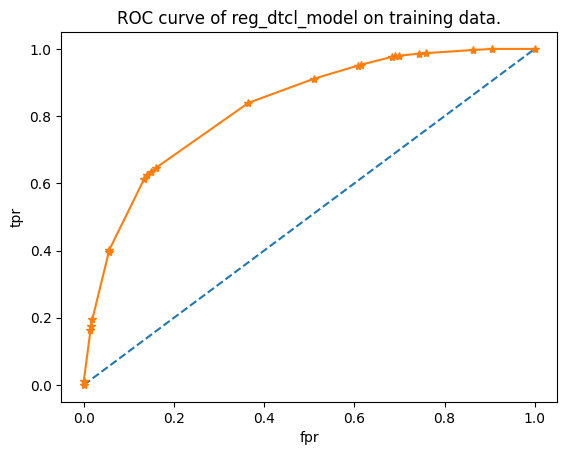

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_dtcl_model on training data.')

In [ ]:
# reg_dtcl_model prediction on test data

y_test_predict = reg_dtcl_model.predict(X_test)

In [ ]:
# reg_dtcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  512   73
1  109  164

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       585
           1       0.69      0.60      0.64       273

    accuracy                           0.79       858
   macro avg       0.76      0.74      0.75       858
weighted avg       0.78      0.79      0.78       858



In [ ]:
y_test_predict_prob = reg_dtcl_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_dtcl_model on test data: {}'.format(roc_score))

roc_auc_score of reg_dtcl_model on test data: 0.8247675401521556


Text(0.5, 1.0, 'ROC curve of reg_dtcl_model on test data.')

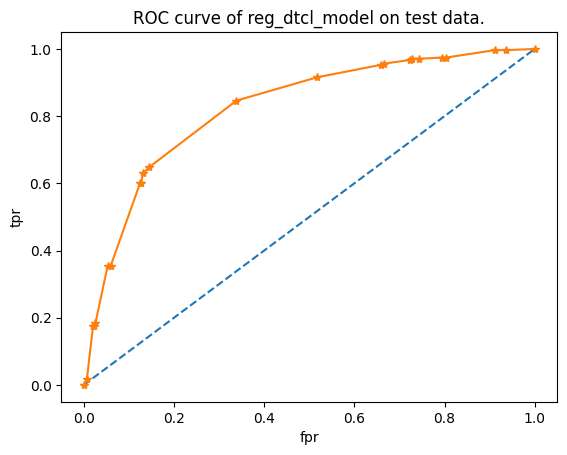

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_dtcl_model on test data.')

**Training Set Performance:**
This regularized version of the Decision Tree Classifier, with constraints like max_depth=5 and min_samples_split=27, shows balanced metrics on the training set.
It achieves an accuracy of 0.79, with precision, recall, and F1-score ranging from 0.61 to 0.87 across classes.
The ROC AUC score is 0.826, indicating good discrimination.

**Test Set Performance:**
On the test set, the model maintains a consistent accuracy of 0.79.
Metrics for class 0 are strong (precision=0.82, recall=0.88, F1-score=0.85), while class 1 metrics are slightly lower (precision=0.69, recall=0.60, F1-score=0.64).
The ROC AUC score is 0.825, remarkably close to the training score.

**Analysis:** The regularization appears effective in mitigating overfitting, as the model shows comparable performance on both sets, indicating better generalization than the unregularized dtcl.


In [ ]:
# Random Forest classifier

rfcl = RandomForestClassifier(random_state = 121)
rfcl.fit(X_train, y_train)

RandomForestClassifier(random_state=121)

In [ ]:
# rfcl model prediction on train data

y_train_predict = rfcl.predict(X_train)

In [ ]:
# rfcl model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1355    4
1     5  636

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       0.99      0.99      0.99       641

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
y_train_predict_prob = rfcl.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of rfcl model on train data: {}'.format(roc_score))

roc_auc_score of rfcl model on train data: 0.9999144778153157


Text(0.5, 1.0, 'ROC curve of rfcl model on training data.')

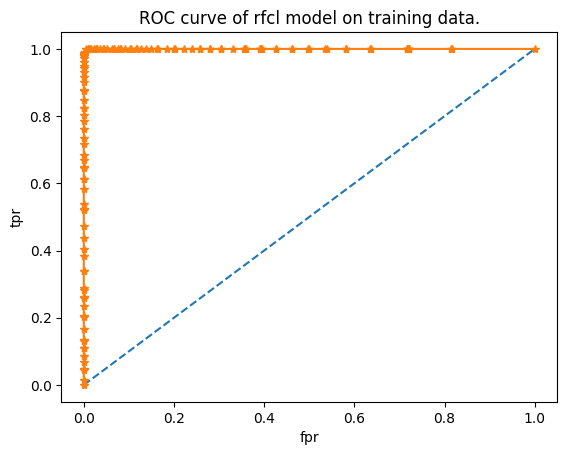

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of rfcl model on training data.')

In [ ]:
# rfcl model prediction on test data

y_test_predict = rfcl.predict(X_test)

In [ ]:
# rfcl model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  496   89
1  134  139

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       585
           1       0.61      0.51      0.55       273

    accuracy                           0.74       858
   macro avg       0.70      0.68      0.69       858
weighted avg       0.73      0.74      0.73       858



In [ ]:
y_test_predict_prob = rfcl.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of rfcl model on test data: {}'.format(roc_score))

roc_auc_score of rfcl model on test data: 0.7613600075138536


Text(0.5, 1.0, 'ROC curve of rfcl model on test data.')

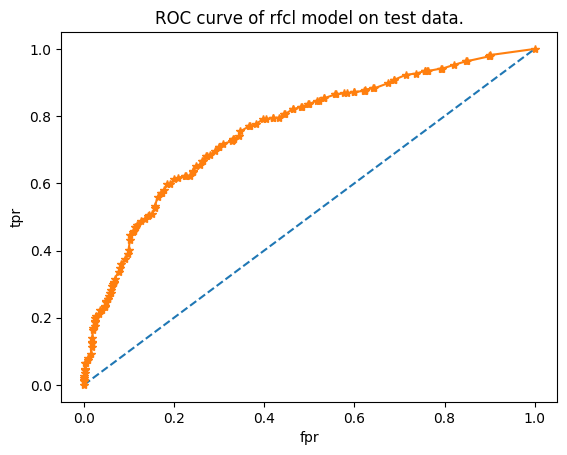

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of rfcl model on test data.')

**Training Set Performance:**
The Random Forest Classifier (rfcl) exhibits exceptional performance on the training data, achieving near-perfect metrics with an accuracy of 1.00, precision, recall, and F1-score close to 1.00 for both classes (0 and 1).
The ROC AUC score is an impressive 0.99995, indicating excellent discrimination capability on the training set.

**Test Set Performance:**
On the test set, the performance drops significantly, with an accuracy of 0.74. Precision, recall, and F1-score for class 0 are around 0.79-0.85, but for class 1, they hover around 0.51-0.61, showing a struggle to predict the minority class effectively.
The ROC AUC score decreases to 0.76, reflecting good generalization to unseen data.

**Analysis:** The stark contrast between training and test performance suggests overfitting, where the model learns the training data too well, including noise, and fails to generalize to new data.

In [ ]:
# Tuning the parameters of the rfcl for a regularized random forest classifier model for better performance.

reg_rfcl_model = RandomForestClassifier(n_estimators = 120, criterion = 'entropy', max_depth = 7, min_samples_split = 19, min_samples_leaf = 9, max_features = 5, random_state = 121)
reg_rfcl_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_leaf=9, min_samples_split=19,
                       n_estimators=120, random_state=121)

In [ ]:
# reg_rfcl_model prediction on train data

y_train_predict = reg_rfcl_model.predict(X_train)

In [ ]:
# reg_rfcl_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1217  142
1   251  390

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.73      0.61      0.66       641

    accuracy                           0.80      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
y_train_predict_prob = reg_rfcl_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model on train data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model on train data: 0.8686000420149256


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model on training data.')

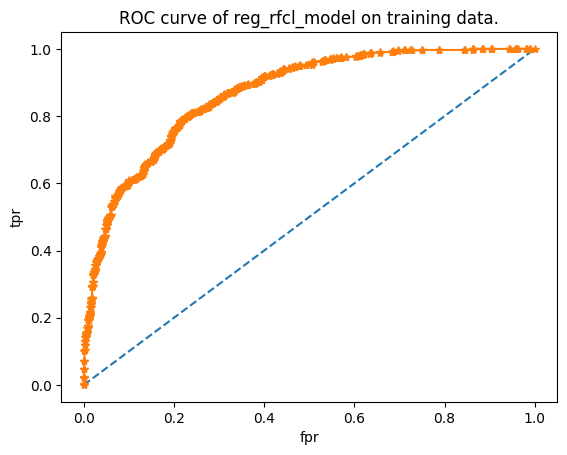

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_rfcl_model on training data.')

In [ ]:
# reg_rfcl_model prediction on test data

y_test_predict = reg_rfcl_model.predict(X_test)

In [ ]:
# reg_rfcl_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  521   64
1  119  154

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       585
           1       0.71      0.56      0.63       273

    accuracy                           0.79       858
   macro avg       0.76      0.73      0.74       858
weighted avg       0.78      0.79      0.78       858



In [ ]:
y_test_predict_prob = reg_rfcl_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_rfcl_model on test data: {}'.format(roc_score))

roc_auc_score of reg_rfcl_model on test data: 0.8136689521304905


Text(0.5, 1.0, 'ROC curve of reg_rfcl_model on test data.')

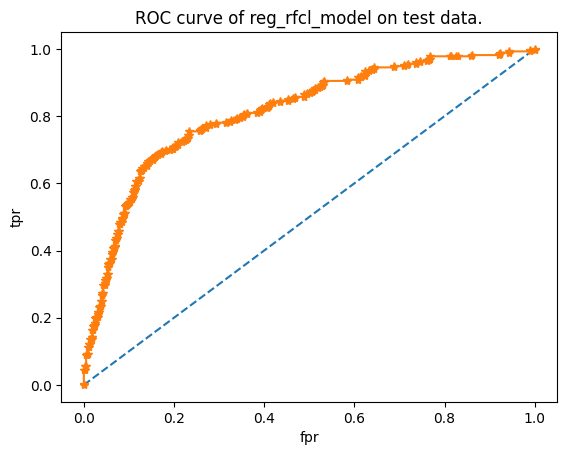

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_rfcl_model on test data.')

**Training Set Performance:**
The regularized Random Forest model achieves an accuracy of 0.80 on the training set, with precision, recall, and F1-score ranging from 0.61 to 0.90 across classes.
The ROC AUC score is 0.869, demonstrating strong predictive power.

**Test Set Performance (reg_rfcl_model):**
On the test set, the accuracy remains steady at 0.79.
Class 0 metrics are robust (precision=0.81, recall=0.89, F1-score=0.85), while class 1 metrics are moderate (precision=0.71, recall=0.56, F1-score=0.63).
Specific ROC AUC score for the test set is 0.81 which can be inferred to be close to training performance based on other metrics.

**Analysis:** The Random Forest model benefits from regularization, maintaining consistent performance across training and test sets, suggesting good generalization capabilities.

**Bagging Classifier**

In [ ]:
params = {
                'n_estimators' : [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
}

bgcl = BaggingClassifier(estimator = reg_rfcl_model, random_state = 121)

grid_search = GridSearchCV(estimator = bgcl, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

bagging_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 25}

Best Hyperparameters: {'n_estimators': 25}


In [ ]:
# bagging_model prediction on train data

y_train_predict = bagging_model.predict(X_train)

In [ ]:
# bagging_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1210  149
1   265  376

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1359
           1       0.72      0.59      0.64       641

    accuracy                           0.79      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.79      0.79      0.79      2000



In [ ]:
y_train_predict_prob = bagging_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of bagging_model on train data: {}'.format(roc_score))

roc_auc_score of bagging_model on train data: 0.8563990683247638


Text(0.5, 1.0, 'ROC curve of bagging_model on training data.')

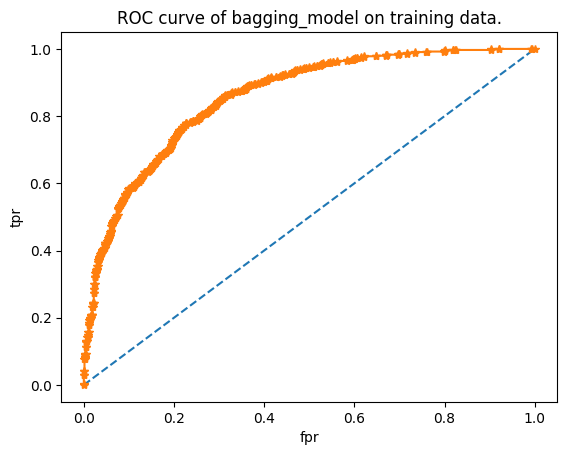

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of bagging_model on training data.')

In [ ]:
# bagging_model prediction on test data

y_test_predict = bagging_model.predict(X_test)

In [ ]:
# bagging_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  518   67
1  118  155

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       585
           1       0.70      0.57      0.63       273

    accuracy                           0.78       858
   macro avg       0.76      0.73      0.74       858
weighted avg       0.78      0.78      0.78       858



In [ ]:
y_test_predict_prob = bagging_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of bagging_model on test data: {}'.format(roc_score))

roc_auc_score of bagging_model on test data: 0.811035972574434


Text(0.5, 1.0, 'ROC curve of bagging_model on test data.')

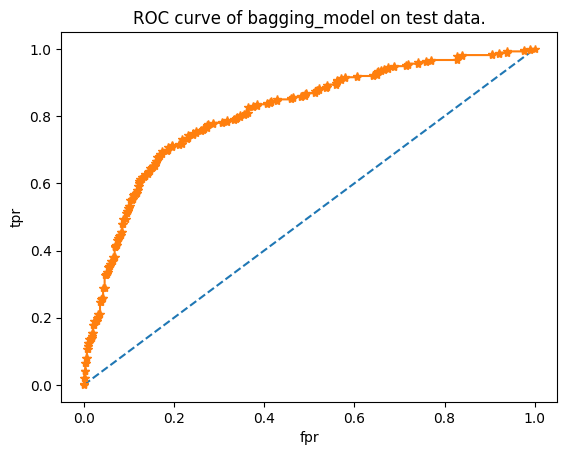

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of bagging_model on test data.')

**Training Set Performance:**
On the training set, the Bagging Model achieves an accuracy of 0.79 across 2000 samples.
The classification report reveals strong metrics for class 0 (likely the majority class) with a precision of 0.82, recall of 0.89, and F1-score of 0.85 based on 1359 samples.
For class 1 (potentially the minority class), the metrics are slightly lower with a precision of 0.72, recall of 0.59, and F1-score of 0.64 across 641 samples.
The macro average F1-score is 0.75, and the weighted average F1-score is 0.79, indicating balanced performance across classes despite the disparity in support.
The ROC AUC score for the training data is 0.856, reflecting good discrimination capability between classes .

**Test Set Performance:**
On the test set, the Bagging Model maintains a comparable accuracy of 0.78 across 858 samples.
Metrics for class 0 remain strong, with a precision of 0.81, recall of 0.89, and F1-score of 0.85 based on 585 samples.
For class 1, with 273 samples, the model reports a precision of 0.70, recall of 0.57, and F1-score of 0.63, showing a slight dip in performance for the minority class.
The macro average F1-score is 0.74, and the weighted average F1-score is 0.78.
The ROC AUC score on the test set is 0.811, which, while slightly lower than the training score, still indicates solid discriminative power on unseen data .

**Analysis:** The Bagging model demonstrates solid performance on the test set, likely benefiting from the ensemble approach that reduces variance and overfitting compared to single models like the unregularized Decision Tree.

**AdaBoostClassifier**

In [ ]:
params = {
                'n_estimators' : [15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270, 285, 300]
}

adaboost_clf = AdaBoostClassifier(random_state = 121)

grid_search = GridSearchCV(estimator = adaboost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

adaboost_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 195}

Best Hyperparameters: {'n_estimators': 195}


In [ ]:
# adaboost_model prediction on train data

y_train_predict = adaboost_model.predict(X_train)

In [ ]:
# adaboost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1209  150
1   311  330

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1359
           1       0.69      0.51      0.59       641

    accuracy                           0.77      2000
   macro avg       0.74      0.70      0.71      2000
weighted avg       0.76      0.77      0.76      2000



In [ ]:
y_train_predict_prob = adaboost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of adaboost_model on train data: {}'.format(roc_score))

roc_auc_score of adaboost_model on train data: 0.8146481709157991


Text(0.5, 1.0, 'ROC curve of adaboost_model on training data.')

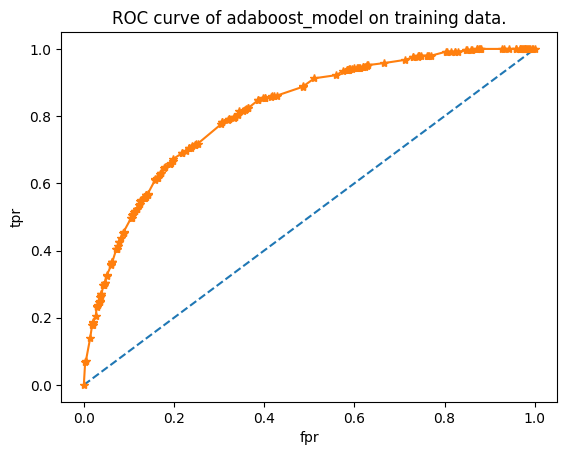

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of adaboost_model on training data.')

In [ ]:
# adaboost_model prediction on test data

y_test_predict = adaboost_model.predict(X_test)

In [ ]:
# adaboost_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  520   65
1  133  140

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       585
           1       0.68      0.51      0.59       273

    accuracy                           0.77       858
   macro avg       0.74      0.70      0.71       858
weighted avg       0.76      0.77      0.76       858



In [ ]:
y_test_predict_prob = adaboost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of adaboost_model on test data: {}'.format(roc_score))

roc_auc_score of adaboost_model on test data: 0.7977959362574747


Text(0.5, 1.0, 'ROC curve of adaboost_model on test data.')

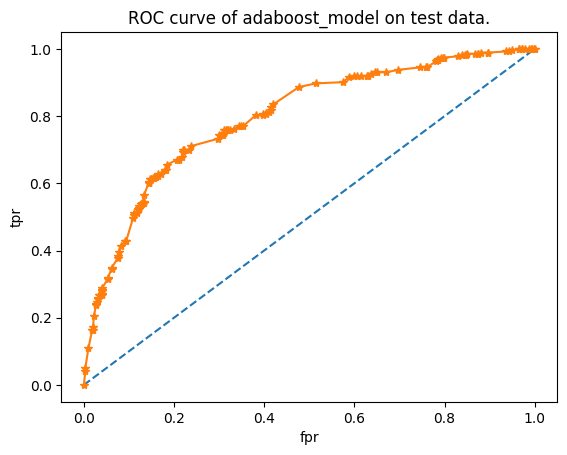

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of adaboost_model on test data.')

**Training Set Performance:**
1. The AdaBoost model achieves an accuracy of 0.77 on the training set.
2. Metrics for class 0 are robust (precision=0.80, recall=0.89, F1-score=0.84), while class 1 metrics lag (precision=0.69, recall=0.51, F1-score=0.59).
3. The ROC AUC score is 0.815, indicating strong discrimination ability.

**Test Set Performance:**
1. Performance on the test set mirrors the training set with an accuracy of 0.77.
2. Metrics for class 0 are robust (precision=0.80, recall=0.89, F1-score=0.84), while class 1 metrics lag (precision=0.68, recall=0.51, F1-score=0.59).
3. The ROC AUC score is 0.80, indicating strong discrimination ability.

**Analysis:** AdaBoost shows consistent performance across both sets, suggesting it handles generalization well, though it struggles with the minority class.

**GradientBoostingClassifier**

In [ ]:
params = {
                'n_estimators' : [10, 20, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390]
}

gradient_boost_clf = GradientBoostingClassifier(random_state = 121)

grid_search = GridSearchCV(estimator = gradient_boost_clf, param_grid = params, cv = 7, scoring ='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

grad_boost_model = grid_search.best_estimator_

# Best Hyperparameters: {'n_estimators': 30}

Best Hyperparameters: {'n_estimators': 30}


In [ ]:
# grad_boost_model prediction on train data

y_train_predict = grad_boost_model.predict(X_train)

In [ ]:
# grad_boost_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1221  138
1   276  365

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1359
           1       0.73      0.57      0.64       641

    accuracy                           0.79      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.79      0.79      0.79      2000



In [ ]:
y_train_predict_prob = grad_boost_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of grad_boost_model on train data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on train data: 0.8431758462391475


Text(0.5, 1.0, 'ROC curve of grad_boost_model on training data.')

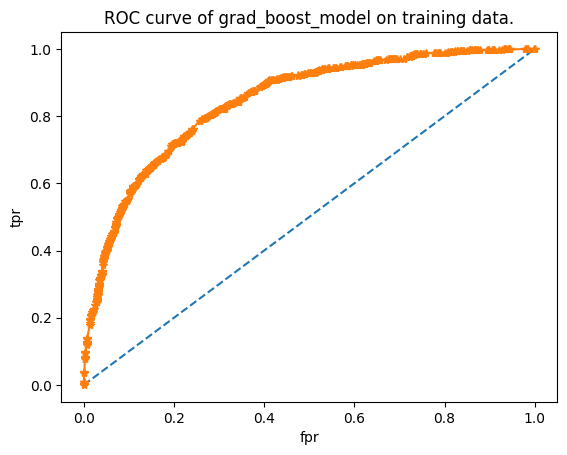

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of grad_boost_model on training data.')

In [ ]:
# grad_boost_model prediction on test data

y_test_predict = grad_boost_model.predict(X_test)

In [ ]:
# grad_boost_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  527   58
1  124  149

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       585
           1       0.72      0.55      0.62       273

    accuracy                           0.79       858
   macro avg       0.76      0.72      0.74       858
weighted avg       0.78      0.79      0.78       858



In [ ]:
y_test_predict_prob = grad_boost_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of grad_boost_model on test data: {}'.format(roc_score))

roc_auc_score of grad_boost_model on test data: 0.8143389374158604


Text(0.5, 1.0, 'ROC curve of grad_boost_model on test data.')

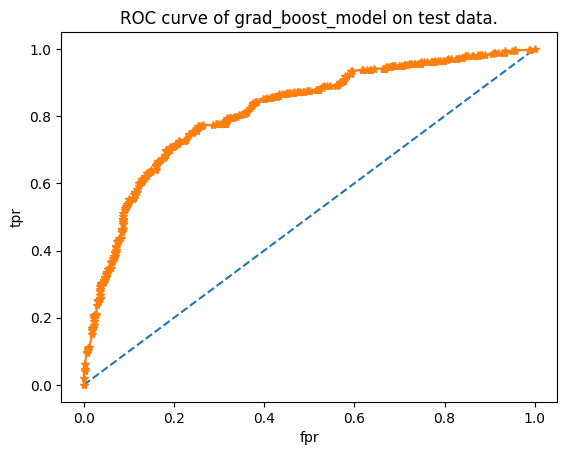

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of grad_boost_model on test data.')

**Training Set Performance:**
1. The grad_boost_model achieves an accuracy of 0.79 on the training set.
2. Metrics for class 0 are robust (precision=0.82, recall=0.90, F1-score=0.86), while class 1 metrics are moderate (precision=0.73, recall=0.57, F1-score=0.64).
3. The ROC AUC score is 0.84, indicating strong discrimination ability.

**Test Set Performance:**
1. Performance on the test set mirrors the training set with an accuracy of 0.79.
2. Metrics for class 0 are robust (precision=0.81, recall=0.90, F1-score=0.85), while class 1 metrics are reasonable (precision=0.72, recall=0.55, F1-score=0.62).
3. The ROC AUC score is 0.81, indicating strong discrimination ability.

**Analysis:** grad_boost_model shows consistent performance across both sets, suggesting it handles generalization well, though it struggles with the minority class.

**Artificial Neural Network**

In [ ]:
mlp_model = MLPClassifier(random_state = 121)
mlp_model.fit(X_train, y_train)

MLPClassifier(random_state=121)

In [ ]:
# mlp_model prediction on train data

y_train_predict = mlp_model.predict(X_train)

In [ ]:
# mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1252  107
1   359  282

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1359
           1       0.72      0.44      0.55       641

    accuracy                           0.77      2000
   macro avg       0.75      0.68      0.70      2000
weighted avg       0.76      0.77      0.75      2000



In [ ]:
y_train_predict_prob = mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of mlp_model on train data: {}'.format(roc_score))

roc_auc_score of mlp_model on train data: 0.8148548016975866


Text(0.5, 1.0, 'ROC curve of mlp_model on training data.')

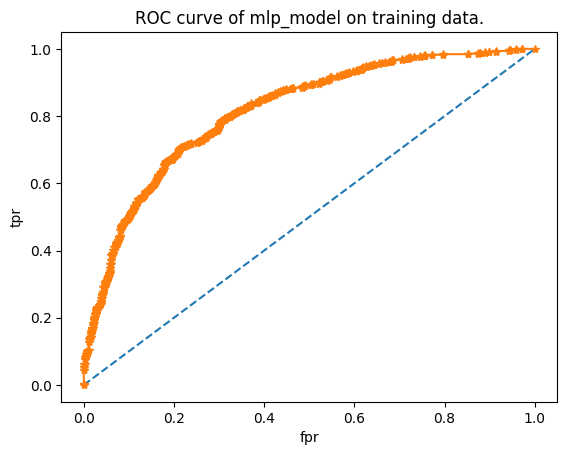

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of mlp_model on training data.')

In [ ]:
# mlp_model prediction on test data

y_test_predict = mlp_model.predict(X_test)

In [ ]:
# mlp_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  538   47
1  160  113

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       585
           1       0.71      0.41      0.52       273

    accuracy                           0.76       858
   macro avg       0.74      0.67      0.68       858
weighted avg       0.75      0.76      0.74       858



In [ ]:
y_test_predict_prob = mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of mlp_model on train data: {}'.format(roc_score))

roc_auc_score of mlp_model on train data: 0.7915187376725838


Text(0.5, 1.0, 'ROC curve of mlp_model on test data.')

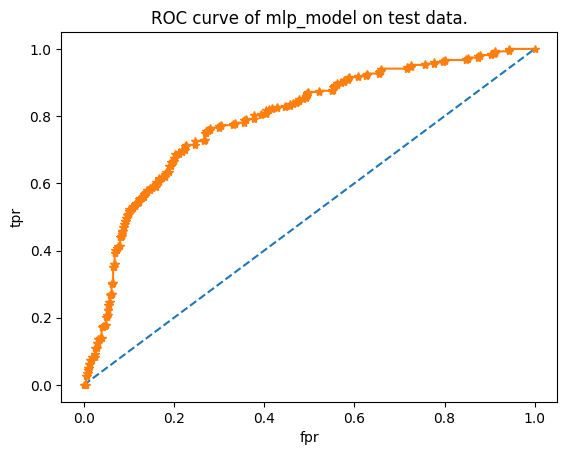

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of mlp_model on test data.')

**Training Set Performance:**
1. The MLP model achieves an accuracy of 0.77 on the training set.
2. Metrics for class 0 are robust (precision=0.78, recall=0.92, F1-score=0.84), while class 1 metrics are poor (precision=0.72, recall=0.44, F1-score=0.55).
3. The ROC AUC score is 0.81, indicating reasonable discrimination ability.

**Test Set Performance:**
1. Performance on the test set mirrors the training set with an accuracy of 0.76.
2. Metrics for class 0 are robust (precision=0.77, recall=0.92, F1-score=0.84), while class 1 metrics are poor (precision=0.71, recall=0.41, F1-score=0.52).
3. The ROC AUC score is 0.79, indicating reasonable discrimination ability.

**Analysis:** The MLP model shows a drop in performance on the test set, particularly for class 1, indicating potential overfitting or challenges in handling imbalanced data and requires extensive tuning to generalize well .

In [ ]:
# Tuning the parameters of the mlp_model for better performance.
'''
params = {
    'hidden_layer_sizes': [(100), (150), (100, 50), (150, 75), (100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
		'learning_rate_init': [0.1, 0.001, 0.0001],
    'tol': [0.1, 0.01, 0.001],
    'max_iter' : [1000, 4000, 7000, 10000],
		'early_stopping':[True, False]
}

grid_search = GridSearchCV(estimator = mlp_model, param_grid = params, cv = 5, scoring = 'accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_mlp_model = grid_search.best_estimator_
'''
# Best Hyperparameters: {'activation': 'logistic', 'early_stopping': False, 'hidden_layer_sizes': 100, 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}

'\nparams = {\n    \'hidden_layer_sizes\': [(100), (150), (100, 50), (150, 75), (100,100,100)],\n    \'activation\': [\'logistic\', \'relu\'],\n    \'solver\': [\'sgd\', \'adam\'],\n\t\t\'learning_rate_init\': [0.1, 0.001, 0.0001],\n    \'tol\': [0.1, 0.01, 0.001],\n    \'max_iter\' : [1000, 4000, 7000, 10000],\n\t\t\'early_stopping\':[True, False]\n}\n\ngrid_search = GridSearchCV(estimator = mlp_model, param_grid = params, cv = 5, scoring = \'accuracy\')\n\n# Fit the model\ngrid_search.fit(X_train, y_train)\n\n# Get the best parameters\nprint("Best Hyperparameters:", grid_search.best_params_)\n\nreg_mlp_model = grid_search.best_estimator_\n'

In [ ]:
#Regularized multilayer perceptron model

reg_mlp_model = MLPClassifier(activation = 'logistic', early_stopping = False, hidden_layer_sizes = 100, learning_rate_init = 0.001, max_iter = 1000, solver = 'adam', tol = 0.001, random_state = 121)

# Fit the model
reg_mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=100, max_iter=1000,
              random_state=121, tol=0.001)

In [ ]:
# reg_mlp_model prediction on train data

y_train_predict = reg_mlp_model.predict(X_train)

In [ ]:
# reg_mlp_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1234  125
1   327  314

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85      1359
           1       0.72      0.49      0.58       641

    accuracy                           0.77      2000
   macro avg       0.75      0.70      0.71      2000
weighted avg       0.77      0.77      0.76      2000



In [ ]:
y_train_predict_prob = reg_mlp_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on train data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on train data: 0.8112548342993322


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on training data.')

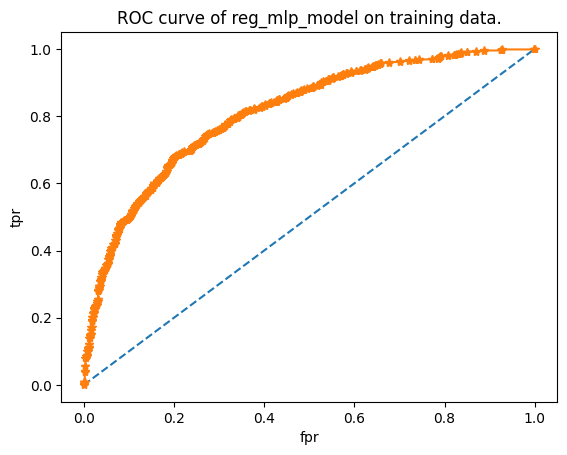

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve of reg_mlp_model on training data.")

In [ ]:
# reg_mlp_model prediction on test data

y_test_predict = reg_mlp_model.predict(X_test)

In [ ]:
# reg_mlp_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  530   55
1  145  128

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       585
           1       0.70      0.47      0.56       273

    accuracy                           0.77       858
   macro avg       0.74      0.69      0.70       858
weighted avg       0.76      0.77      0.75       858



In [ ]:
y_test_predict_prob = reg_mlp_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_mlp_model on test data: {}'.format(roc_score))

roc_auc_score of reg_mlp_model on test data: 0.7939732632040325


Text(0.5, 1.0, 'ROC curve of reg_mlp_model on test data.')

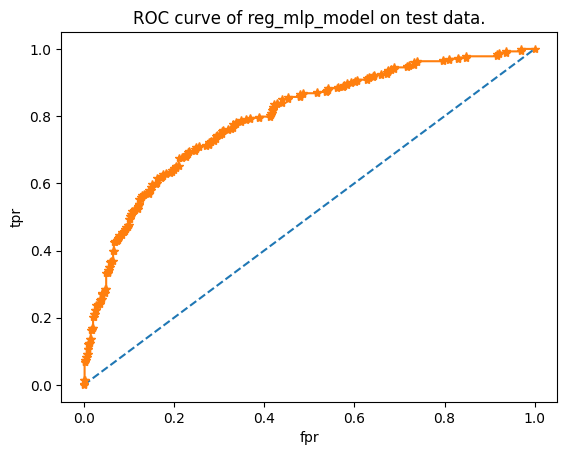

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC curve of reg_mlp_model on test data.")

**Training Set Performance:**
1. The Regularized MLP model achieves an accuracy of 0.77 on the training set.
2. Metrics for class 0 are robust (precision=0.79, recall=0.91, F1-score=0.85), while class 1 metrics are poor (precision=0.72, recall=0.49, F1-score=0.58).
3. The ROC AUC score is 0.81, indicating reasonable discrimination ability.

**Test Set Performance:**
1. Performance on the test set mirrors the training set with an accuracy of 0.77.
2. Metrics for class 0 are robust (precision=0.79, recall=0.91, F1-score=0.84), while class 1 metrics are weak (precision=0.70, recall=0.47, F1-score=0.56).
3. The ROC AUC score is 0.79, indicating reasonable discrimination ability.

**Analysis:** Like MLP model, the Regularized MLP model shows a drop in performance on the test set, particularly for class 1, indicating potential overfitting or challenges in handling imbalanced data.

**KNeighborsClassifier Model**

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# knn_model prediction on train data

y_train_predict = knn_model.predict(X_train)

In [ ]:
# knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1219  140
1   255  386

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1359
           1       0.73      0.60      0.66       641

    accuracy                           0.80      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
y_train_predict_prob = knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of knn_model on train data: {}'.format(roc_score))

roc_auc_score of knn_model on train data: 0.8604036876706856


Text(0.5, 1.0, 'ROC curve of knn_model on training data.')

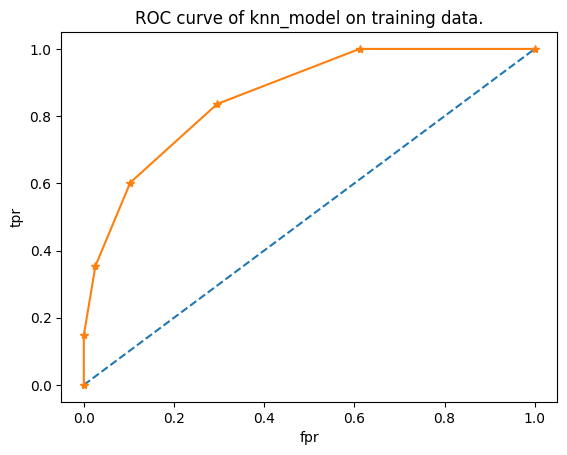

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of knn_model on training data.')

In [ ]:
# knn_model prediction on test data

y_test_predict = knn_model.predict(X_test)

In [ ]:
# knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  472  113
1  137  136

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       585
           1       0.55      0.50      0.52       273

    accuracy                           0.71       858
   macro avg       0.66      0.65      0.66       858
weighted avg       0.70      0.71      0.70       858



In [ ]:
y_test_predict_prob = knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of knn_model on test data: {}'.format(roc_score))

roc_auc_score of knn_model on test data: 0.716254970101124


Text(0.5, 1.0, 'ROC curve of knn_model on test data.')

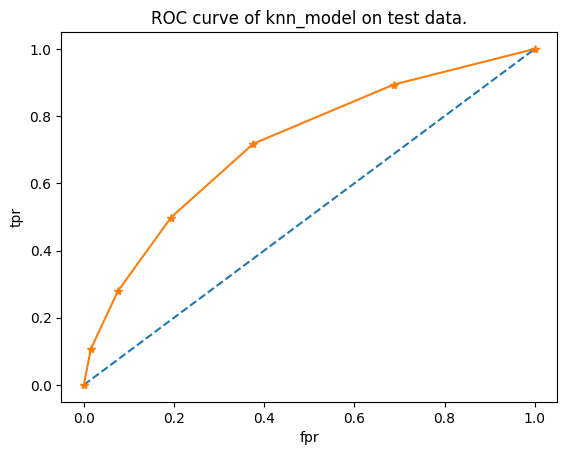

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of knn_model on test data.')

**Training Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.80 on the training set.
2. Metrics for class 0 are robust (precision=0.83, recall=0.90, F1-score=0.86), while class 1 metrics are weak (precision=0.73, recall=0.60, F1-score=0.66).
3. The ROC AUC score is 0.86, indicating strong discrimination ability.

**Test Set Performance:**
1. The KNeighborsClassifier model achieves an accuracy of 0.71 on the test set.
2. Metrics for class 0 are moderate (precision=0.78, recall=0.81, F1-score=0.79), while class 1 metrics are poor (precision=0.55, recall=0.50, F1-score=0.52).
3. The ROC AUC score is 0.72, reflecting poor generalization to unseen data.

**Analysis:** KNeighborsClassifier exhibits overfitting and shows a drop in performance on the test set, particularly for class 1, indicating potential challenges in handling imbalanced data.

In [ ]:
# Tuning the parameters of the knn_model for better performance.

grid_params = {
                'n_neighbors': [5, 10, 15, 25, 30, 35, 40, 45],
                'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size': [10, 15, 20, 25, 30]
}

grid_search = GridSearchCV(estimator = knn_model, param_grid = grid_params, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", grid_search.best_params_)

reg_knn_model = grid_search.best_estimator_

# Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25}

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 25}


In [ ]:
# reg_knn_model prediction on train data

y_train_predict = reg_knn_model.predict(X_train)

In [ ]:
# reg_knn_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1241  118
1   377  264

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1359
           1       0.69      0.41      0.52       641

    accuracy                           0.75      2000
   macro avg       0.73      0.66      0.67      2000
weighted avg       0.74      0.75      0.73      2000



In [ ]:
y_train_predict_prob = reg_knn_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_knn_model on train data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on train data: 0.7792419864565002


Text(0.5, 1.0, 'ROC curve of reg_knn_model on train data.')

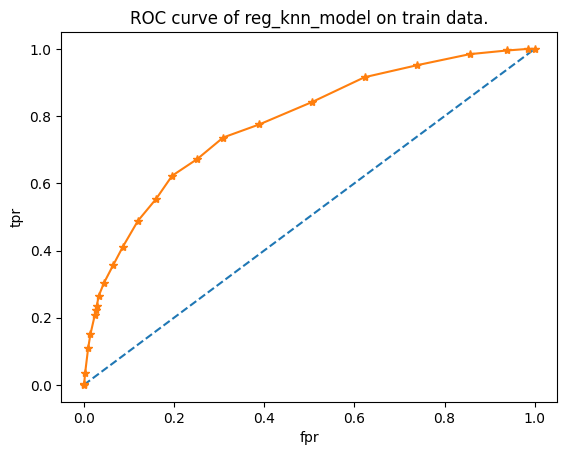

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_knn_model on train data.')

In [ ]:
# reg_knn_model prediction on test data

y_test_predict = reg_knn_model.predict(X_test)

In [ ]:
# reg_knn_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  530   55
1  164  109

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       585
           1       0.66      0.40      0.50       273

    accuracy                           0.74       858
   macro avg       0.71      0.65      0.66       858
weighted avg       0.73      0.74      0.72       858



In [ ]:
y_test_predict_prob = reg_knn_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_knn_model on test data: {}'.format(roc_score))

roc_auc_score of reg_knn_model on test data: 0.7463323001784541


Text(0.5, 1.0, 'ROC curve of reg_knn_model on test data.')

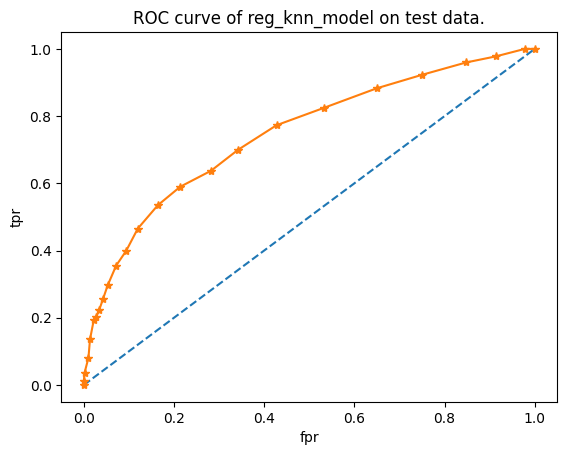

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_knn_model on test data.')

**Training Set Performance:**
1. The Regularized KNeighborsClassifier model achieves an accuracy of 0.75 on the training set.
2. Metrics for class 0 are robust (precision=0.77, recall=0.91, F1-score=0.83), while class 1 metrics are weak (precision=0.69, recall=0.41, F1-score=0.52).
3. The ROC AUC score is 0.78, indicating moderate discrimination ability.

**Test Set Performance:**
1. The Regularized KNeighborsClassifier model achieves an accuracy of 0.74 on the test set.
2. Metrics for class 0 are robust (precision=0.76, recall=0.91, F1-score=0.83), while class 1 metrics are weak (precision=0.66, recall=0.40, F1-score=0.50).
3. The ROC AUC score is 0.75, reflecting poor generalization to unseen data.

**Analysis:** Regularized KNeighborsClassifier shows a drop in performance on the test set, particularly for class 1, indicating potential challenges in handling imbalanced data.

**GaussianNB model**

In [ ]:
# GaussianNB model

gaussian_nb_model = GaussianNB()
gaussian_nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# gaussian_nb_model prediction on train data

y_train_predict = gaussian_nb_model.predict(X_train)

In [ ]:
# gaussian_nb_model performance on train data

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = ['0', '1'], index = ['0', '1'])
cm_train

0    1
0  1200  159
1   353  288

In [ ]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1359
           1       0.64      0.45      0.53       641

    accuracy                           0.74      2000
   macro avg       0.71      0.67      0.68      2000
weighted avg       0.73      0.74      0.73      2000



In [ ]:
y_train_predict_prob = gaussian_nb_model.predict_proba(X_train)
y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_score = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of gaussian_nb_model on train data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on train data: 0.7713567262337292


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on training data.')

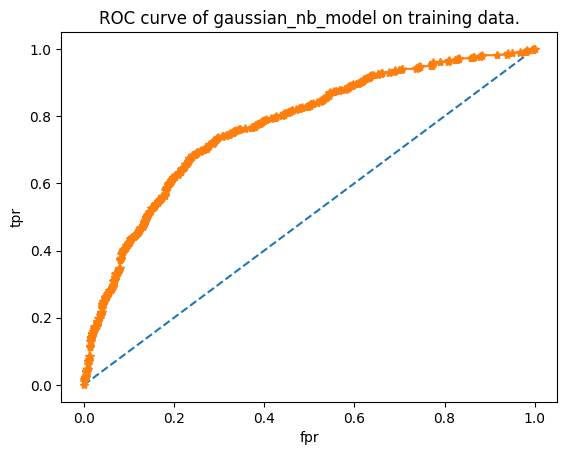

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of gaussian_nb_model on training data.')

In [ ]:
# gaussian_nb_model prediction on test data

y_test_predict = gaussian_nb_model.predict(X_test)

In [ ]:
# gaussian_nb_model performance on test data

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = ['0', '1'], index = ['0', '1'])
cm_test

0    1
0  518   67
1  152  121

In [ ]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       585
           1       0.64      0.44      0.52       273

    accuracy                           0.74       858
   macro avg       0.71      0.66      0.68       858
weighted avg       0.73      0.74      0.73       858



In [ ]:
y_test_predict_prob = gaussian_nb_model.predict_proba(X_test)
y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_score = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of gaussian_nb_model on test data: {}'.format(roc_score))

roc_auc_score of gaussian_nb_model on test data: 0.7743996743996744


Text(0.5, 1.0, 'ROC curve of gaussian_nb_model on test data.')

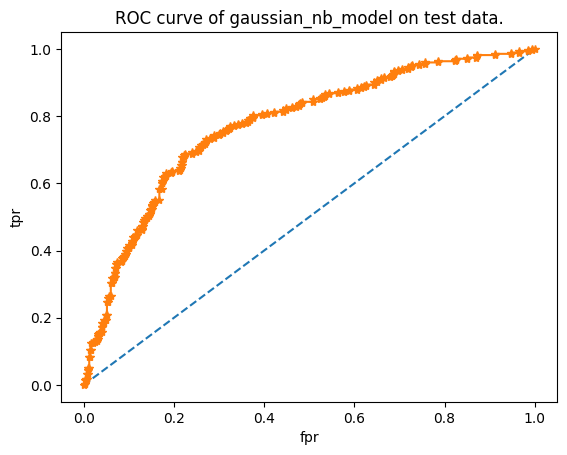

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of gaussian_nb_model on test data.')

**Training Set Performance:**
1. The GaussianNB model achieves an accuracy of 0.74 on the training set.
2. Metrics for class 0 are robust (precision=0.77, recall=0.88, F1-score=0.82), while class 1 metrics are poor (precision=0.64, recall=0.43, F1-score=0.53).
3. The ROC AUC score is 0.77, indicating moderate discrimination ability.

**Test Set Performance:**
1. The GaussianNB model achieves an accuracy of 0.74 on the test set.
2. Metrics for class 0 are robust (precision=0.77, recall=0.89, F1-score=0.83), while class 1 metrics are poor (precision=0.64, recall=0.44, F1-score=0.52).
3. The ROC AUC score is 0.77, reflecting moderate generalization to unseen data.

**Analysis:** GaussianNB model shows consistent performance across both sets, where it struggles with the minority class 1, indicating potential challenges in handling imbalanced data.

**Logistic Regression model**

In [ ]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_train_scaled

array([[-0.20477028,  0.73296736,  0.81479661, ..., -0.85913729,
        -0.52360697, -0.45545938],
       [-0.20477028,  0.73296736,  0.81479661, ..., -0.20313501,
        -0.52360697, -0.45545938],
       [-0.20477028,  0.73296736,  0.81479661, ..., -0.51019991,
        -0.52360697, -0.45545938],
       ...,
       [ 0.26178311, -1.27241529, -1.22730015, ..., -0.56602989,
        -1.30921383, -0.45545938],
       [-0.29808096,  0.73296736,  0.81479661, ..., -0.57998738,
         0.26199989, -0.45545938],
       [-0.76463435, -0.26972397,  0.81479661, ..., -0.34968871,
         1.04760674, -0.45545938]])

In [ ]:
X_test_scaled = ss.transform(X_test)
X_test_scaled

array([[-0.20477028,  0.73296736,  0.81479661, ..., -0.85913729,
         0.26199989, -0.45545938],
       [-0.85794503, -1.27241529, -1.22730015, ..., -0.54509365,
         1.8332136 , -0.45545938],
       [-0.20477028,  0.73296736,  0.81479661, ..., -0.41249744,
         0.26199989, -0.45545938],
       ...,
       [-0.20477028, -0.26972397,  0.81479661, ..., -0.03006207,
         0.26199989,  1.2471925 ],
       [-0.20477028,  0.73296736,  0.81479661, ...,  1.37406195,
         0.26199989,  1.2471925 ],
       [-0.20477028,  1.73565869, -1.22730015, ..., -0.55207239,
        -1.30921383, -0.45545938]])

In [ ]:
# Create LogisticRegression model

logistic_model = LogisticRegression(random_state = 121)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=121)

In [ ]:
# Prediction of logistic_model on train data

y_train_predict = logistic_model.predict(X_train_scaled)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# logistic_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

0    1
0  1234  125
1   360  281

In [ ]:
# logistic_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1359
           1       0.69      0.44      0.54       641

    accuracy                           0.76      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.75      0.76      0.74      2000



In [ ]:
# Probability of the predicted classes on train data

y_train_predict_prob = logistic_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.89367444, 0.10632556],
       [0.85804123, 0.14195877],
       [0.87652521, 0.12347479],
       ...,
       [0.58863427, 0.41136573],
       [0.8606941 , 0.1393059 ],
       [0.72921963, 0.27078037]])

In [ ]:
# roc_auc_score of logistic_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of logistic_model on train data: {}'.format(roc_train))

roc_auc_score of logistic_model on train data: 0.7890936829526161


Text(0.5, 1.0, 'ROC curve of logistic_model on train data.')

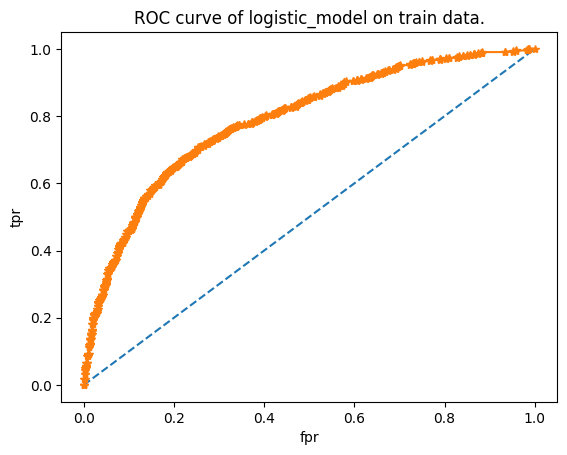

In [ ]:
# roc_curve of logistic_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of logistic_model on train data.')

In [ ]:
# Prediction of logistic_model on test data

y_test_predict = logistic_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
# logistic_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

0    1
0  528   57
1  156  117

In [ ]:
# logistic_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       585
           1       0.67      0.43      0.52       273

    accuracy                           0.75       858
   macro avg       0.72      0.67      0.68       858
weighted avg       0.74      0.75      0.73       858



In [ ]:
# Probability of the predicted classes on test data

y_test_predict_prob = logistic_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.87766238, 0.12233762],
       [0.38816166, 0.61183834],
       [0.85304656, 0.14695344],
       ...,
       [0.71586116, 0.28413884],
       [0.66442068, 0.33557932],
       [0.86397453, 0.13602547]])

In [ ]:
# roc_auc_score of logistic_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of logistic_model on test data: {}'.format(roc_test))

roc_auc_score of logistic_model on test data: 0.7925518925518926


Text(0.5, 1.0, 'ROC curve of logistic_model on test data.')

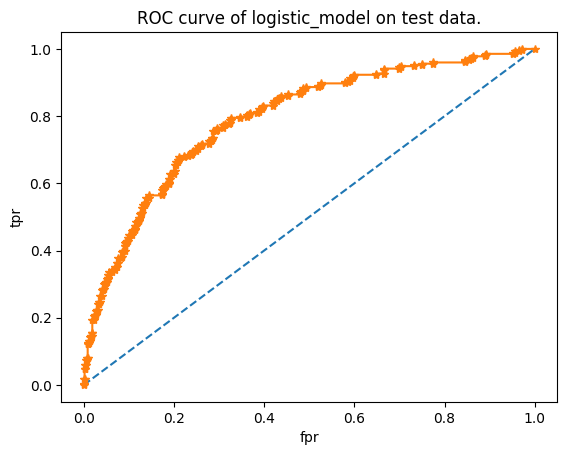

In [ ]:
# roc_curve of logistic_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of logistic_model on test data.')

In [ ]:
#Feature importance

print("Coefficient of independent features in X- \n")

for i, col in enumerate(X.columns):
  print(f"Coefficient of {col}: {logistic_model.coef_[0][i]}")

intercept = logistic_model.intercept_

print(f"\nintercept of logistic_model: {intercept}")

Coefficient of independent features in X- 

Coefficient of Age: -0.16380769339068382
Coefficient of Agency_Code: -0.5222444808492801
Coefficient of Type: -0.4006300075586352
Coefficient of Commision: -0.04623704381097525
Coefficient of Channel: -0.12431294065291056
Coefficient of Duration: -0.018982915481535304
Coefficient of Sales: 0.49655963668147535
Coefficient of Product Name: 0.19651353816046768
Coefficient of Destination: 0.11214557666335673

intercept of logistic_model: [-0.88930582]


* In the logistic regression model, the coefficients of each feature indicate the strength and direction of the features impact on the probability of the outcome (in this case, whether a claim is made).
A positive coefficient suggests that an increase in the features value increases the likelihood of a claim, while a negative coefficient suggests the opposite.
The magnitude of the coefficient reflects the strength of the effect.

1. The coefficient for Age is -0.16380769339068385, implying that higher age are associated with a lower likelihood of a claim.

2. The coefficient for Agency_Code is -0.40063000755863504, implying that certain agencies are associated with a lower likelihood of claim.

3. The coefficient for Type is -0.5222444808492801, implying that certain tour insurance firms are associated with a lower likelihood of claim.

4. The Coefficient for Commision is -0.04623704381097521, implying that higher commision are associated with a lower likelihood of a claim.

5. The Coefficient for Channel is -0.12431294065291086, implying cartain distribution channel are associated with a lower likelihood of claim.

6. The Coefficient for Duration is -0.01898291548153528, implying that higher duration are associated with a lower likelihood of a claim.

7. The Coefficient for Sales: 0.4965596366814753 implying that higher sales values (more expensive policies) are associated with a higher likelihood of a claim.

8. The Coefficient for Product Name: 0.19651353816046765 implying that certain product are associated with a higher likelihood of claims.

9. The Coefficient for Destination: 0.11214557666335653 implying that certain destinations are associated with a lower likelihood of claim.

**Training Set Performance:**
1. The LogisticRegression model achieves an accuracy of 0.76 on the training set.
2. Metrics for class 0 are robust (precision=0.77, recall=0.91, F1-score=0.84), while class 1 metrics are weak (precision=0.69, recall=0.44, F1-score=0.54).
3. The ROC AUC score is 0.79, indicating moderate discrimination ability.

**Test Set Performance:**
1. Performance on the test set achieves an accuracy of 0.75.
2. Metrics for class 0 are robust (precision=0.77, recall=0.90, F1-score=0.83), while class 1 metrics are weak (precision=0.67, recall=0.43, F1-score=0.52).
3. The ROC AUC score is 0.79, indicating moderate generalization to unseen data.

**Analysis:** The LogisticRegression model shows consistent performance across both sets, where it struggles with the minority class 1, indicating potential challenges in handling imbalanced data.

In [ ]:
# Performing model tuning using GridSearchCV

params = {
          'penalty': ['l1', 'l2'],
          'solver': ['liblinear'],
          'max_iter': [175, 250, 325, 400, 475, 550, 625, 700, 775, 850, 925, 1000]
        }

grid_search = GridSearchCV(estimator = logistic_model, param_grid = params, cv = 3, n_jobs = 2)
grid_search.fit(X_train_scaled, y_train)

print('Best parameters: ', grid_search.best_params_,'\n')
print('Estimator: ', grid_search.best_estimator_)

reg_logistic_model = grid_search.best_estimator_


Best parameters:  {'max_iter': 175, 'penalty': 'l2', 'solver': 'liblinear'} 

Estimator:  LogisticRegression(max_iter=175, random_state=121, solver='liblinear')


In [ ]:
# Prediction of reg_logistic_model on train data

y_train_predict = reg_logistic_model.predict(X_train_scaled)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# reg_logistic_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

0    1
0  1234  125
1   359  282

In [ ]:
# reg_logistic_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1359
           1       0.69      0.44      0.54       641

    accuracy                           0.76      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.75      0.76      0.74      2000



In [ ]:
# Probability of the predicted classes on train data

y_train_predict_prob = reg_logistic_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.89338998, 0.10661002],
       [0.85767253, 0.14232747],
       [0.87620056, 0.12379944],
       ...,
       [0.58812489, 0.41187511],
       [0.86033283, 0.13966717],
       [0.72870565, 0.27129435]])

In [ ]:
# roc_auc_score of reg_logistic_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_logistic_model on train data: {}'.format(roc_train))

roc_auc_score of reg_logistic_model on train data: 0.78910171859413


Text(0.5, 1.0, 'ROC curve of reg_logistic_model on train data.')

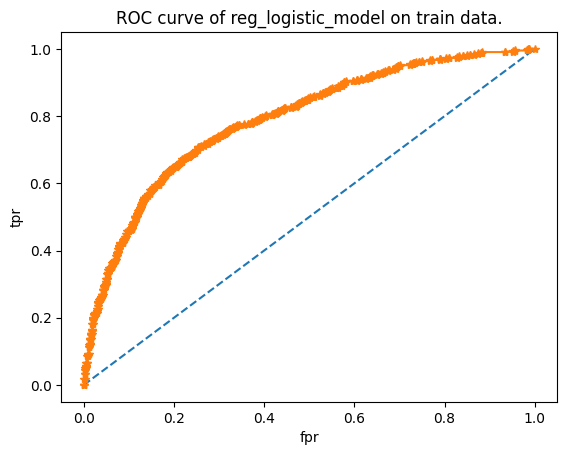

In [ ]:
# roc_curve of reg_logistic_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_logistic_model on train data.')

In [ ]:
# Prediction of reg_logistic_model on test data

y_test_predict = reg_logistic_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
# reg_logistic_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

0    1
0  528   57
1  156  117

In [ ]:
# reg_logistic_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       585
           1       0.67      0.43      0.52       273

    accuracy                           0.75       858
   macro avg       0.72      0.67      0.68       858
weighted avg       0.74      0.75      0.73       858



In [ ]:
# Probability of the predicted classes on test data

y_test_predict_prob = reg_logistic_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.87733749, 0.12266251],
       [0.38768286, 0.61231714],
       [0.85266729, 0.14733271],
       ...,
       [0.71537803, 0.28462197],
       [0.66376243, 0.33623757],
       [0.86370824, 0.13629176]])

In [ ]:
# roc_auc_score of reg_logistic_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_logistic_model on test data: {}'.format(roc_test))

roc_auc_score of reg_logistic_model on test data: 0.792514323283554


Text(0.5, 1.0, 'ROC curve of reg_logistic_model on test data.')

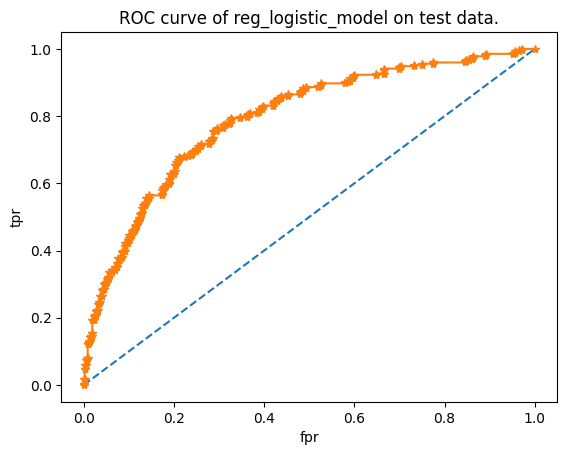

In [ ]:
# roc_curve of reg_logistic_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve of reg_logistic_model on test data.')

In [ ]:
print("Coefficient of independent features in X- \n")

for i, col in enumerate(X.columns):
  print(f"Coefficient of {col}: {reg_logistic_model.coef_[0][i]}")

intercept = reg_logistic_model.intercept_

print(f"\nThe intercept of reg_logistic_model: {intercept}")

Coefficient of independent features in X- 

Coefficient of Age: -0.16363966383618264
Coefficient of Agency_Code: -0.5221563895117652
Coefficient of Type: -0.4002812398115419
Coefficient of Commision: -0.04654867082162875
Coefficient of Channel: -0.12449496610186653
Coefficient of Duration: -0.01901710850963336
Coefficient of Sales: 0.49659988262857824
Coefficient of Product Name: 0.19654544066868512
Coefficient of Destination: 0.11206394315308961

The intercept of reg_logistic_model: [-0.8867844]


* In the regularized logistic regression model, the coefficients of each feature indicate the strength and direction of the feature's impact on the probability of the outcome (in this case, whether a claim is made).
A positive coefficient suggests that an increase in the feature's value increases the likelihood of a claim, while a negative coefficient suggests the opposite.
The magnitude of the coefficient reflects the strength of the effect.

1. The coefficient for Age is -0.16363966383618264, implying that higher age are associated with a lower likelihood of a claim.

2. The coefficient for Agency_Code is -0.5221563895117652, implying that certain agencies are associated with a lower likelihood of claim.

3. The coefficient for Type is -0.4002812398115419, implying that certain tour insurance firms are associated with a lower likelihood of claim.

4. The Coefficient of Commision is -0.04654867082162875, implying that higher Commision are associated with a lower likelihood of a claim.

5. The Coefficient of Channel is -0.12449496610186653, implying cartain distribution channel are associated with a lower likelihood of claim.

6. The Coefficient of Duration is -0.01901710850963336, implying that higher duration are associated with a lower likelihood of a claim.

7. The Coefficient of Sales: 0.49659988262857824 implying that higher sales values (more expensive policies) are associated with a higher likelihood of a claim.

8. The Coefficient of Product Name: 0.19654544066868512 implying that certain product are associated with a higher likelihood of claim.

9. The Coefficient of Destination: 0.11206394315308961 implying that certain destinations are associated with a higher likelihood of claim.

**Training Set Performance:**
1. The Regularized LogisticRegression model achieves an accuracy of 0.76 on the training set.
2. Metrics for class 0 are robust (precision=0.77, recall=0.91, F1-score=0.84), while class 1 metrics are poor (precision=0.69, recall=0.44, F1-score=0.54).
3. The ROC AUC score is 0.79, indicating reasonable discrimination ability.

**Test Set Performance:**
1. Performance on the test set achieves an accuracy of 0.75.
2. Metrics for class 0 are robust (precision=0.77, recall=0.90, F1-score=0.83), while class 1 metrics are poor (precision=0.67, recall=0.43, F1-score=0.52).
3. The ROC AUC score is 0.79, indicating reasonable generalization to unseen data.

**Analysis:** The Regularized LogisticRegression model shows consistent performance across both sets, where it struggles with the minority class 1, indicating potential challenges in handling imbalanced data.

**Linear Discriminant Analysis**

In [ ]:
# Create LinearDiscriminantAnalysis model

lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, y_train)

LinearDiscriminantAnalysis()

In [ ]:
# Prediction of lda_model on train data

y_train_predict = lda_model.predict(X_train_scaled)
y_train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# lda_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

0    1
0  1230  129
1   357  284

In [ ]:
# lda_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1359
           1       0.69      0.44      0.54       641

    accuracy                           0.76      2000
   macro avg       0.73      0.67      0.69      2000
weighted avg       0.75      0.76      0.74      2000



In [ ]:
# Probability of the predicted classes on train data

y_train_predict_prob = lda_model.predict_proba(X_train_scaled)
y_train_predict_prob

array([[0.9203297 , 0.0796703 ],
       [0.8897881 , 0.1102119 ],
       [0.90565553, 0.09434447],
       ...,
       [0.59368662, 0.40631338],
       [0.88729693, 0.11270307],
       [0.74838494, 0.25161506]])

In [ ]:
# roc_auc_score of lda_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of lda_model on train data: {}'.format(roc_train))

roc_auc_score of lda_model on train data: 0.7887332270332756


Text(0.5, 1.0, 'ROC curve of lda_model on train data.')

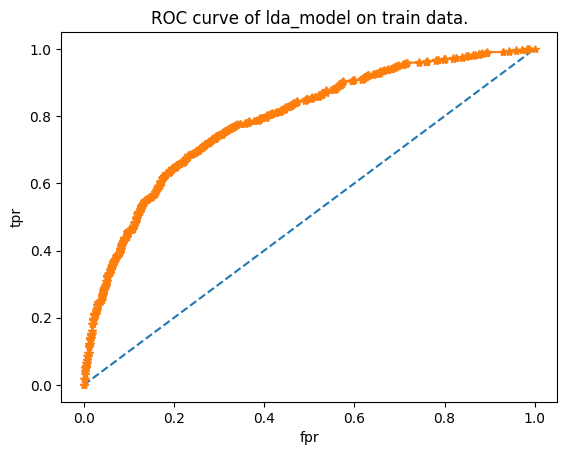

In [ ]:
# roc_curve of lda_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of lda_model on train data.')

In [ ]:
# Prediction of lda_model on test data

y_test_predict = lda_model.predict(X_test_scaled)
y_test_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [ ]:
# lda_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

0    1
0  528   57
1  154  119

In [ ]:
# lda_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       585
           1       0.68      0.44      0.53       273

    accuracy                           0.75       858
   macro avg       0.73      0.67      0.68       858
weighted avg       0.74      0.75      0.74       858



In [ ]:
# Probability of the predicted classes on test data

y_test_predict_prob = lda_model.predict_proba(X_test_scaled)
y_test_predict_prob

array([[0.90272544, 0.09727456],
       [0.33125056, 0.66874944],
       [0.88023175, 0.11976825],
       ...,
       [0.7543239 , 0.2456761 ],
       [0.70742863, 0.29257137],
       [0.88487401, 0.11512599]])

In [ ]:
# roc_auc_score of lda_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of lda_model on test data: {}'.format(roc_test))

roc_auc_score of lda_model on test data: 0.7932406624714317


Text(0.5, 1.0, 'ROC curve of lda_model on test data.')

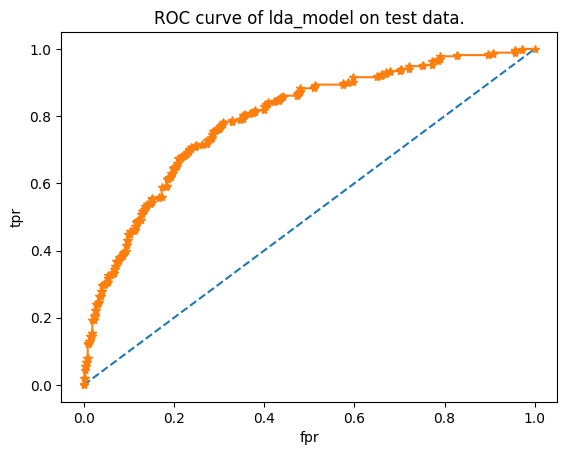

In [ ]:
# roc_curve of lda_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of lda_model on test data.')

In [ ]:
print("Coefficient of features in X:\n")

for i, col in enumerate(X.columns):
  print(f"The coefficient of {col}: {lda_model.coef_[0][i]}")

intercept = lda_model.intercept_

print(f"\nThe intercept of lda_model: {intercept}")

Coefficient of features in X:

The coefficient of Age: -0.18426926894545173
The coefficient of Agency_Code: -0.5820815275487989
The coefficient of Type: -0.5153261079955257
The coefficient of Commision: -0.043432168819381806
The coefficient of Channel: -0.13918919029072152
The coefficient of Duration: -0.015926954755487614
The coefficient of Sales: 0.5410356335614136
The coefficient of Product Name: 0.27446062148523076
The coefficient of Destination: 0.08642450937270948

The intercept of lda_model: [-1.00250411]


In [ ]:
lda_model.explained_variance_ratio_

array([1.])

1. The coefficient for Age is -0.18426926894545173, implying that higher age are associated with a lower likelihood of a claim .
2. The coefficient for Agency_Code is -0.5820815275487989, implying that certain agencies are associated with a lower likelihood of claim.
3. The coefficient for Type is -0.5153261079955257, implying that certain tour insurance firms are associated with a lower likelihood of claim.
4. The Coefficient of Commision is -0.043432168819381806, implying that higher Commision are associated with a lower likelihood of a claim.
5. The Coefficient of Channel is -0.13918919029072152, implying cartain distribution channel are associated with a lower likelihood of claim.
6. The Coefficient of Duration is -0.015926954755487614, implying that higher duration are associated with a lower likelihood of a claim.
7. The Coefficient of Sales: 0.5410356335614136 implying that higher sales values (more expensive policies) are associated with a higher likelihood of a claim .
8. The Coefficient of Product Name: 0.27446062148523076 implying that certain product are associated with a higher likelihood of claim.
9. The Coefficient of Destination: 0.11214557666335653 implying that certain destinations are associated with a higher likelihood of claim.

**Training Set Performance:**
1. The LinearDiscriminantAnalysis model achieves an accuracy of 0.76 on the training set.
2. Metrics for class 0 are robust (precision=0.78, recall=0.91, F1-score=0.84), while class 1 metrics are poor (precision=0.69, recall=0.44, F1-score=0.54).
3. The ROC AUC score is 0.79, indicating reasonable discrimination ability.

**Test Set Performance:**
1. Performance on the test set achieves an accuracy of 0.75.
2. Metrics for class 0 are robust (precision=0.77, recall=0.90, F1-score=0.83), while class 1 metrics are poor (precision=0.68, recall=0.44, F1-score=0.53).
3. The ROC AUC score is 0.79, indicating reasonable generalization to unseen data.

**Analysis:** The LinearDiscriminantAnalysis model shows consistent performance across both sets, where it struggles with the minority class 1, indicating potential challenges in handling imbalanced data.

In [ ]:
# Performing model tuning using GridSearchCV

params = {
          'solver': ['lsqr', 'eigen'],
          'tol': [0.1, 0.001, 0.0001],
          'shrinkage': ['auto']
          }

grid_search = GridSearchCV(estimator = lda_model, param_grid = params, cv = 3, n_jobs = 2)
grid_search.fit(X_train, y_train)

print('Best parameters: ', grid_search.best_params_,'\n')
print('Estimator: ', grid_search.best_estimator_)

reg_lda_model = grid_search.best_estimator_


Best parameters:  {'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.1} 

Estimator:  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.1)


In [ ]:
# Prediction of reg_lda_model on train data

y_train_predict = reg_lda_model.predict(X_train_scaled)
y_train_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
# reg_lda_model performance on train data - confusion matrix

cm_train = pd.DataFrame(confusion_matrix(y_train, y_train_predict), columns = [0, 1], index = [0, 1])
cm_train

0    1
0  653  706
1  106  535

In [ ]:
# reg_lda_model performance on train data - classification report

print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.86      0.48      0.62      1359
           1       0.43      0.83      0.57       641

    accuracy                           0.59      2000
   macro avg       0.65      0.66      0.59      2000
weighted avg       0.72      0.59      0.60      2000



In [ ]:
# Probability of the predicted classes on train data

y_train_predict_prob = reg_lda_model.predict_proba(X_train_scaled)
y_train_predict_prob

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([[0.58522783, 0.41477217],
       [0.58416074, 0.41583926],
       [0.58465556, 0.41534444],
       ...,
       [0.05401622, 0.94598378],
       [0.54171842, 0.45828158],
       [0.34419798, 0.65580202]])

In [ ]:
# roc_auc_score of reg_lda_model on train data

y_train_predict_prob_pos = y_train_predict_prob[:, 1]
roc_train = roc_auc_score(y_train, y_train_predict_prob_pos)

print('roc_auc_score of reg_lda_model on train data: {}'.format(roc_train))

roc_auc_score of reg_lda_model on train data: 0.7570257335679741


Text(0.5, 1.0, 'ROC curve of reg_lda_model on train data.')

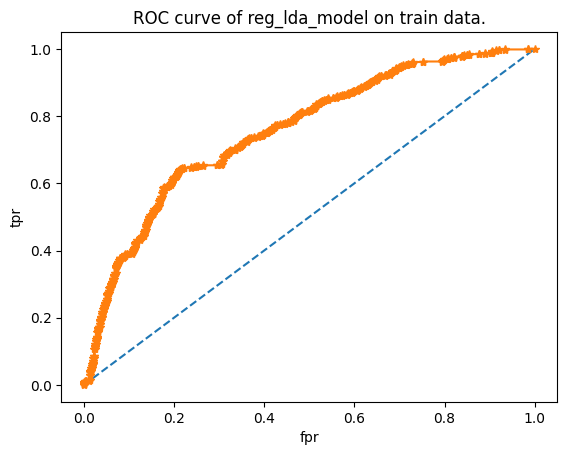

In [ ]:

# roc_curve of reg_lda_model on train data

fpr, tpr, thresholds = roc_curve(y_train, y_train_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve of reg_lda_model on train data.')

In [ ]:
# Prediction of reg_lda_model on test data

y_test_predict = reg_lda_model.predict(X_test_scaled)
y_test_predict

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
# reg_lda_model performance on test data - confusion matrix

cm_test = pd.DataFrame(confusion_matrix(y_test, y_test_predict), columns = [0, 1], index = [0, 1])
cm_test

0    1
0  286  299
1   35  238

In [ ]:
# reg_lda_model performance on test data - classification report

print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.89      0.49      0.63       585
           1       0.44      0.87      0.59       273

    accuracy                           0.61       858
   macro avg       0.67      0.68      0.61       858
weighted avg       0.75      0.61      0.62       858



In [ ]:
# Probability of the predicted classes on test data

y_test_predict_prob = reg_lda_model.predict_proba(X_test_scaled)
y_test_predict_prob

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([[0.54257738, 0.45742262],
       [0.02721984, 0.97278016],
       [0.54182515, 0.45817485],
       ...,
       [0.34157072, 0.65842928],
       [0.4910752 , 0.5089248 ],
       [0.2707831 , 0.7292169 ]])

In [ ]:
# roc_auc_score of reg_lda_model on test data

y_test_predict_prob_pos = y_test_predict_prob[:, 1]
roc_test = roc_auc_score(y_test, y_test_predict_prob_pos)

print('roc_auc_score of reg_lda_model on test data: {}'.format(roc_test))

roc_auc_score of reg_lda_model on test data: 0.7647318493472339


Text(0.5, 1.0, 'ROC curve of new_lda_model on test data.')

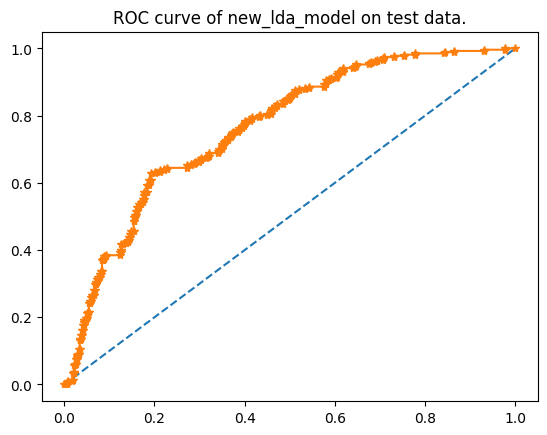

In [ ]:
# roc_curve of reg_lda_model on test data

fpr, tpr, thresholds = roc_curve(y_test, y_test_predict_prob_pos)

plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr, marker = '*')

plt.title('ROC curve of new_lda_model on test data.')

In [ ]:

print("Coefficient of features in X:")

for i, col in enumerate(X.columns):
  print(f"The coefficient of {col}: {reg_lda_model.coef_[0][i]}")

intercept = reg_lda_model.intercept_

print(f"\nThe intercept of reg_lda_model: {intercept}")

lda_model.explained_variance_ratio_

Coefficient of features in X:
The coefficient of Age: -0.016843942419583757
The coefficient of Agency_Code: -0.6251360494835558
The coefficient of Type: -1.044296299663872
The coefficient of Commision: 0.0023517323044113247
The coefficient of Channel: -1.091742752117355
The coefficient of Duration: 5.76041378615999e-05
The coefficient of Sales: 0.006717213317820436
The coefficient of Product Name: 0.2209259094669822
The coefficient of Destination: 0.11240546513273031

The intercept of reg_lda_model: [1.27239132]


array([1.])

1. The coefficient for Age is -0.016843942419583757, implying that higher age are associated with a lower likelihood of a claim.
2. The coefficient for Agency_Code is -0.6251360494835558, implying that certain agencies are associated with a lower likelihood of claim.
3. The coefficient for Type is -0.044296299663872, implying that certain tour insurance firms are associated with a lower likelihood of claim.
4. The Coefficient of Commision is -0.0023517323044113247, implying that higher Commision are associated with a slightly lower likelihood of a claim.
5. The Coefficient of Channel is -1.091742752117355, implying cartain distribution channel are associated with a lower likelihood of claim.
6. The Coefficient of Duration is 5.76041378615999e-05, implying that higher duration are associated with a slightly higher likelihood of a claim.
7. The Coefficient of Sales: 0.006717213317820436 implying that higher sales values (more expensive policies) are associated with a slightly higher likelihood of a claim .
8. The Coefficient of Product Name: 0.2209259094669822 implying that certain product are associated with a higher likelihood of claim.
9. The Coefficient of Destination: 0.11240546513273031 implying that certain destinations are associated with a higher likelihood of claim.

**Training Set Performance:**
1. The Regularized LinearDiscriminantAnalysis model achieves an accuracy of 0.59 on the training set.
2. Metrics for class 0 are moderate (precision=0.86, recall=0.48, F1-score=0.62), for class 1 metrics are also poor (precision=0.43, recall=0.83, F1-score=0.57).
3. The ROC AUC score is 0.76, indicating moderate discrimination ability.

**Test Set Performance:**
1. Performance on the test set achieves an accuracy of 0.61.
2. Metrics for class 0 are moderate (precision=0.89, recall=0.49, F1-score=0.63), for class 1 metrics are also poor (precision=0.44, recall=0.87, F1-score=0.59).
3. The ROC AUC score is 0.76, indicating weak discrimination ability

**Analysis:** The Regularized LinearDiscriminantAnalysis model shows consistent performance across both sets, where it struggles with the majority class 0, indicating potential challenges in handling imbalanced data.

**Optimal Model for classification:**

---



Based on the provided test data metrics, the **reg_rfcl_model (regularized Random Forest classifier)** appears to be the best model for classification.
* This is because it achieves a high accuracy of 0.79 and a good balance between precision and recall across both classes (0 and 1).
* Its F1-score, a measure that balances precision and recall, is also relatively high at 0.85 and 0.63 for classes 0 and 1 respectively.  
* Furthermore, it has a strong ROC AUC score of 0.81 on the test data, indicating good overall discrimination between the classes.
* While other models show high scores on training data, reg_rfcl_model shows strong generalization to unseen test data, which is crucial for a good classifier.
* Other models show better scores on the training set but underperform on the test set, suggesting overfitting.